# Pandas 한번에 제대로 배우기




---



## Pandas 특징

* 부동 소수점이 아닌 데이터 뿐만 아니라 부동 소수점 데이터에서도 결측 데이터(NaN으로
표시됨)를 쉽게 처리
* 크기 변이성(Size mutability): DataFrame 및 고차원 객체에서 열을 삽입 및 삭제 가능
* 자동 및 명시적(explicit) 데이터 정렬: 객체를 라벨 집합에 명시적으로 정렬하거나, 사용자가
라벨을 무시하고 Series, DataFrame 등의 계산에서 자동으로 데이터 조정 가능
* 데이터 세트에서 집계 및 변환을 위한 분할(split), 적용(apply), 결합(combine) 작업을 수행
할 수 있는 강력하고 유연한 group-by 함수 제공
* 누락된 데이터 또는 다른 Python 및 NumPy 데이터 구조에서 서로 다른 인덱싱 데이터를
DataFrame 개체로 쉽게 변환
* 대용량 데이터 세트의 지능형 라벨 기반 슬라이싱, 고급 인덱싱 및 부분 집합 구하기 가능
* 직관적인 데이터 세트 병합 및 결합
* 데이터 세트의 유연한 재구성 및 피벗
* 축의 계층적 라벨링(눈금당 여러 개의 라벨을 가질 수 있음)
* 플랫 파일(CSV 및 구분), Excel 파일, 데이터베이스 로딩 및 초고속 HDF5 형식의 데이터 저
장/로드에 사용되는 강력한 IO 도구
* 시계열 특정 기능: 날짜 범위 생성 및 주파수 변환, 무빙 윈도우(moving window) 통계, 날짜
이동 및 지연

In [ ]:
import numpy as np
import pandas as pd
pd.__version__

'1.3.5'

## Pandas 객체


### Series 객체

In [ ]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0]) #리스트 데이터를 시리즈로 변환
s

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

In [ ]:
s.values #view values only

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [ ]:
s.index #view index details

RangeIndex(start=0, stop=5, step=1)

In [ ]:
s[1] #인덱스로 값 접근 가능 

0.25

In [ ]:
s[1:4] #슬라이싱 가능

1    0.25
2    0.50
3    0.75
dtype: float64

In [ ]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index = ['a','b','c','d','e']) #인덱스 지정 가능
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [ ]:
s['c']

0.5

In [ ]:
s[['c','d','e']]

c    0.50
d    0.75
e    1.00
dtype: float64

In [ ]:
'b' in s

True

In [ ]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index = [2, 4, 6, 8, 10])

In [ ]:
s[4]

0.25

In [ ]:
s[2:]

6     0.50
8     0.75
10    1.00
dtype: float64

In [ ]:
s.unique()

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [ ]:
s.value_counts()

0.00    1
0.25    1
0.50    1
0.75    1
1.00    1
dtype: int64

In [ ]:
s.isin([0.25, 0.75, 0.8])

2     False
4      True
6     False
8      True
10    False
dtype: bool

In [ ]:
pop_tuple = {'서울특별시': 9720846,
             '부산광역시': 3404423,
             '인천광역시': 2947217}
population = pd.Series(pop_tuple)
population

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
dtype: int64

In [ ]:
population['서울특별시']

9720846

In [ ]:
population['서울특별시':'인천광역시']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
dtype: int64

### DataFrame 객체

In [ ]:
pd.DataFrame([{'A':2, 'B':4, 'D':3}, {'A':4, 'B':5, 'C':7}])

,A,B,D,C
0,2,4,3.0,NaN
1,4,5,NaN,7.0


In [ ]:
pd.DataFrame(np.random.rand(5,5),
             columns = ['A','B','C','D','E'],
             index = [1,2,3,4,5])

,A,B,C,D,E
1,0.886552,0.102381,0.466505,0.739381,0.747653
2,0.073878,0.788864,0.776498,0.693643,0.902782
3,0.513305,0.508062,0.521579,0.555805,0.726148
4,0.263596,0.249091,0.141733,0.560488,0.799787
5,0.194872,0.978444,0.652459,0.658848,0.940917


In [ ]:
male_tuple = {'서울특별시': 4732275,
             '부산광역시': 1668618,
             '인천광역시': 1476813}
male = pd.Series(male_tuple)
male

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
dtype: int64

In [ ]:
female_tuple = {'서울특별시': 4988571,
             '부산광역시': 1735805,
             '인천광역시': 1470404}
female = pd.Series(female_tuple)
female

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
dtype: int64

In [ ]:
korea_df = pd.DataFrame({'인구수': population,
                         '남자인구수': male,
                         '여자인구수': female})
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404


In [ ]:
korea_df.index

Index(['서울특별시', '부산광역시', '인천광역시'], dtype='object')

In [ ]:
korea_df.columns

Index(['인구수', '남자인구수', '여자인구수'], dtype='object')

In [ ]:
korea_df['여자인구수']

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
Name: 여자인구수, dtype: int64

In [ ]:
korea_df['서울특별시':'부산광역시']

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805


### Index 객체


클래스 | 설명
-------|--------
`Index` |일반적인 Index 객체이며, NumPy 배열 형식으로 축의 이름 표현
`Int64Index` | 정수 값을 위한 Index
`MultiIndex` | 단일 축에 여러 단계 색인을 표현하는 계층적 Index 객체 (튜플의 배열과 유사)
`DatetimeIndex` | NumPy의 datetime64 타입으로 타임스탬프 저장
`PeriodIndex` | 기간 데이터를 위한 Index


In [ ]:
idx = pd.Index([2,4,6,8,10])
idx

Int64Index([2, 4, 6, 8, 10], dtype='int64')

In [ ]:
idx[1]

4

In [ ]:
idx[1:2:2]

Int64Index([4], dtype='int64')

In [ ]:
idx[-1::]

Int64Index([10], dtype='int64')

In [ ]:
idx[::2] #2 step

Int64Index([2, 6, 10], dtype='int64')

In [ ]:
print(idx)
print(idx.size)
print(idx.shape)
print(idx.ndim)
print(idx.dtype)

Int64Index([2, 4, 6, 8, 10], dtype='int64')
5
(5,)
1
int64


#### Index 연산

연산자  | 메소드 | 설명
-------|------|--------
|`append`| 색인 객체를 추가한 새로운 색인 반환
|`difference`| 색인의 차집합 반환
& |`intersection`| 색인의 교집합 반환
\| |`union`| 색인의 합집합 반환
|`isin`| 색인이 존재하는지 여부를 불리언 배열로 반환
|`delete`| 색인이 삭제된 새로운 색인 반환
|`drop`| 값이 삭제된 새로운 색인 반환
|`insert`| 색인이 추가된 새로운 색인 반환
|`is_monotonic`| 색인이 단조성을 가지면 True
|`is_unique`| 중복되는 색인이 없다면 True
|`unique`| 색인에서 중복되는 요소를 제거하고 유일한 값만 반환

In [ ]:
idx1 = pd.Index([1,2,3,6,8])
idx2 = pd.Index([2,4,5,6,7])

print(idx1.append(idx2)) 

print(idx1.difference(idx2)) 
print(idx1 - idx2)

print(idx1.intersection(idx2)) 
print(idx1 & idx2)

print(idx1.union(idx2)) #중복 없음
print(idx1 | idx2)

print(idx1 ^ idx2) #여집합 (공통된 거 뺀 나머지 부분)

print(idx1.delete(0)) #0번째 값 삭제

print(idx1.drop(2)) #2라는 값을 삭제



Int64Index([1, 2, 3, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 3, 8], dtype='int64')
Int64Index([-1, -2, -2, 0, 1], dtype='int64')
Int64Index([2, 6], dtype='int64')
Int64Index([2, 6], dtype='int64')
Int64Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 3, 4, 5, 7, 8], dtype='int64')
Int64Index([2, 3, 6, 8], dtype='int64')
Int64Index([1, 3, 6, 8], dtype='int64')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  from ipykernel import kernelapp as app




---



## 인덱싱(Indexing)

In [ ]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index = ['a','b','c','d','e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [ ]:
s['b']

0.25

In [ ]:
'b' in s

True

In [ ]:
s.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [ ]:
list(s.items())

[('a', 0.0), ('b', 0.25), ('c', 0.5), ('d', 0.75), ('e', 1.0)]

In [ ]:
s['f'] = 1.25
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
dtype: float64

In [ ]:
s['a':'d']

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [ ]:
s[0:4]

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [ ]:
s[(s > 0.4) & (s < 0.8)]

c    0.50
d    0.75
dtype: float64

In [ ]:
s[['a','c','e']]

a    0.0
c    0.5
e    1.0
dtype: float64

### Series 인덱싱

In [ ]:
s = pd.Series(['a','b','c','d','e'],
              index = [1,3,5,7,9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [ ]:
s[1]

'a'

In [ ]:
s[2:4]

5    c
7    d
dtype: object

In [ ]:
s.iloc[1] #int 형태로 접근

'b'

In [ ]:
s.iloc[2:4] #0,1,2,3,4,.. 으로 

5    c
7    d
dtype: object

In [ ]:
s.reindex(range(10)) #새로운 인덱스 구축. 없는 값는 NaN

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [ ]:
s.reindex(range(10), method = 'bfill') #NaN을 대신 채워줌

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

### DataFrame 인덱싱


사용 방법 | 설명
---------|----------
`df[val]`|  하나의 컬럼 또는 여러 컬럼을 선택
`df.loc[val]`|  라벨값으로 로우의 부분집합 선택
`df.loc[:, val]`|  라벨값으로 컬럼의 부분집합 선택
`df.loc[val1, val2]`|  라벨값으로 로우와 컬럼의 부분집합 선택
`df.iloc[where]`|  정수 색인으로 로우의 부분집합 선택
`df.iloc[:, where]`|  정수 색인으로 컬럼의 부분집합 선택
`df.iloc[where_i, where_j]`|  정수 색인으로 로우와 컬럼의 부분집합 선택
`df.at[label_i, label_j]`|  로우와 컬럼의 라벨로 단일 값 선택
`df.iat[i, j]`|  로우와 컬럼의 정수 색인으로 단일 값 선택
`reindex `| 하나 이상의 축을 새로운 색인으로 재색인
`get_value`, `set_value`| 로우와 컬럼의 이름으로 값 선택


In [ ]:
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404


In [ ]:
korea_df['남자인구수']  

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
Name: 남자인구수, dtype: int64

In [ ]:
korea_df.남자인구수 

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
Name: 남자인구수, dtype: int64

In [ ]:
korea_df.여자인구수

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
Name: 여자인구수, dtype: int64

In [ ]:
korea_df['남여비율'] = (korea_df['남자인구수']*100 / korea_df['여자인구수'])

In [ ]:
korea_df.남여비율

서울특별시     94.862336
부산광역시     96.129346
인천광역시    100.435867
Name: 남여비율, dtype: float64

In [ ]:
korea_df.values

array([[9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01],
       [3.40442300e+06, 1.66861800e+06, 1.73580500e+06, 9.61293463e+01],
       [2.94721700e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02]])

In [ ]:
korea_df.T #transpose

,서울특별시,부산광역시,인천광역시
인구수,9.720846e+06,3.404423e+06,2.947217e+06
남자인구수,4.732275e+06,1.668618e+06,1.476813e+06
여자인구수,4.988571e+06,1.735805e+06,1.470404e+06
남여비율,9.486234e+01,9.612935e+01,1.004359e+02


In [ ]:
korea_df.values[0]

array([9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01])

In [ ]:
korea_df['인구수']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
Name: 인구수, dtype: int64

In [ ]:
korea_df.loc[:'인천광역시', :'남자인구수'] #컬럼명으로 슬라이싱

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


In [ ]:
korea_df.loc[korea_df.여자인구수 > 3000000]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336


In [ ]:
korea_df.loc[(korea_df.인구수 < 4000000)]

,인구수,남자인구수,여자인구수,남여비율
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867


In [ ]:
korea_df.loc[korea_df.남여비율 > 100] #남자가 더 많은

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947217,1476813,1470404,100.435867


In [ ]:
korea_df.loc[(korea_df.인구수 > 2500000) & (korea_df.남여비율 > 100)]

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947217,1476813,1470404,100.435867


In [ ]:
korea_df.iloc[:3, :2]

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


### 다중 인덱싱(Multi Indexing)

* 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3차원, 4차원 이상의 고차원 데이터 처리
* 단일 인덱스 내에 여러 인덱스를 포함하는 다중 인덱싱

#### 다중 인덱스 Series

In [ ]:
korea_df

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867


In [ ]:
idx_tuples = [('서울특별시',2010), ('서울특별시', 2020),
              ('부산광역시',2010), ('부산광역시', 2020),
              ('인천광역시',2010), ('인천광역시', 2020)]
idx_tuples

[('서울특별시', 2010),
 ('서울특별시', 2020),
 ('부산광역시', 2010),
 ('부산광역시', 2020),
 ('인천광역시', 2010),
 ('인천광역시', 2020)]

In [ ]:
pop_tuples = [10312545, 9720846,
              2567910, 3404423,
              2758296, 2947217]
population = pd.Series(pop_tuples, index = idx_tuples)
population

(서울특별시, 2010)    10312545
(서울특별시, 2020)     9720846
(부산광역시, 2010)     2567910
(부산광역시, 2020)     3404423
(인천광역시, 2010)     2758296
(인천광역시, 2020)     2947217
dtype: int64

In [ ]:
midx = pd.MultiIndex.from_tuples(idx_tuples)
midx

MultiIndex([('서울특별시', 2010),
            ('서울특별시', 2020),
            ('부산광역시', 2010),
            ('부산광역시', 2020),
            ('인천광역시', 2010),
            ('인천광역시', 2020)],
           )

In [ ]:
population = population.reindex(midx)
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
dtype: int64

In [ ]:
population[:,2010]

서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
dtype: int64

In [ ]:
population['인천광역시',:]

2010    2758296
2020    2947217
dtype: int64

In [ ]:
korea_mdf = population.unstack() 
korea_mdf

,2010,2020
부산광역시,2567910,3404423
서울특별시,10312545,9720846
인천광역시,2758296,2947217


In [ ]:
korea_mdf.stack() #다중인덱싱 구조로 다시 변환

부산광역시  2010     2567910
       2020     3404423
서울특별시  2010    10312545
       2020     9720846
인천광역시  2010     2758296
       2020     2947217
dtype: int64

In [ ]:
male_tuples = [5111259, 4732275,
              1773170, 1668618,
              1390356, 1476813]
male_tuples

[5111259, 4732275, 1773170, 1668618, 1390356, 1476813]

In [ ]:
korea_mdf = pd.DataFrame({'총인구수': population,
                          '남자인구수':male_tuples})
korea_mdf #남자인구수를 다중인덱싱에 포함되도록 추가

총인구수    남자인구수
서울특별시 2010  10312545  5111259
      2020   9720846  4732275
부산광역시 2010   2567910  1773170
      2020   3404423  1668618
인천광역시 2010   2758296  1390356
      2020   2947217  1476813

In [ ]:
female_tuples = [5101286, 4988571,
                 1794740, 1735805,
                 1367940, 1470404]
female_tuples

[5101286, 4988571, 1794740, 1735805, 1367940, 1470404]

In [ ]:
korea_mdf = pd.DataFrame({'총인구수': population,
                          '남자인구수':male_tuples,
                          '여자인구수':female_tuples})
korea_mdf #남자/여자 인구수를 다중인덱싱에 포함되도록 추가

총인구수    남자인구수    여자인구수
서울특별시 2010  10312545  5111259  5101286
      2020   9720846  4732275  4988571
부산광역시 2010   2567910  1773170  1794740
      2020   3404423  1668618  1735805
인천광역시 2010   2758296  1390356  1367940
      2020   2947217  1476813  1470404

In [ ]:
ratio = korea_mdf['남자인구수'] * 100 / korea_mdf['여자인구수']

In [ ]:
ratio.unstack()

,2010,2020
부산광역시,98.798155,96.129346
서울특별시,100.195500,94.862336
인천광역시,101.638668,100.435867


In [ ]:
korea_mdf = pd.DataFrame({'총인구수': population,
                          '남자인구수':male_tuples,
                          '여자인구수':female_tuples,
                          '남여비율':ratio})
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
서울특별시 2010  10312545  5111259  5101286  100.195500
      2020   9720846  4732275  4988571   94.862336
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

#### 다중 인덱스 생성

In [ ]:
df = pd.DataFrame(np.random.rand(6,3),
                  index = [['a','a','b','b','c','c'], [1,2,1,2,1,2]],
                  columns = ['c1','c2','c3'])
df

c1        c2        c3
a 1  0.910549  0.247114  0.909020
  2  0.702846  0.581693  0.783024
b 1  0.876744  0.342491  0.936614
  2  0.391274  0.542675  0.050464
c 1  0.258450  0.581300  0.476743
  2  0.068426  0.975692  0.725139

In [ ]:
pd.MultiIndex.from_arrays([['a','a','b','b','c','c'], [1,2,1,2,1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [ ]:
pd.MultiIndex.from_tuples([('a',1),('a',2),('b',1),('b',2),('c',1),('c',2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [ ]:
pd.MultiIndex.from_product([['a','b','c'], [1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [ ]:
pd.MultiIndex(levels = [['a','b','c'], [1,2]],
              codes = [[0,0,1,1,2,2],[0,1,0,1,0,1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [ ]:
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
dtype: int64

In [ ]:
population.index.names = ['행정구역', '년도']
population  

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
dtype: int64

In [ ]:
idx = pd.MultiIndex.from_product([['a','b','c'],[1,2]],
                                 names = ['name1','name2'])
cols = pd.MultiIndex.from_product([['c1','c2','c3'],[1,2]],
                                  names = ['col_name1','col_name2'])
data = np.round(np.random.randn(6,6), 2)
mdf = pd.DataFrame(data, index = idx, columns = cols)
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1      0.24 -0.74 -1.04 -1.33  0.44 -0.02
      2      0.10  1.12  0.01  0.11  0.31 -0.59
b     1     -0.55 -0.12  0.73  0.16 -1.29 -0.80
      2     -1.02 -0.47  0.67 -0.55 -0.46  0.23
c     1     -0.48  1.03 -0.31  1.75  0.21  0.28
      2      0.80  1.52  0.85  0.68 -0.98  0.51

In [ ]:
mdf['c2']

col_name2       1     2
name1 name2            
a     1     -1.04 -1.33
      2      0.01  0.11
b     1      0.73  0.16
      2      0.67 -0.55
c     1     -0.31  1.75
      2      0.85  0.68

#### 인덱싱 및 슬라이싱

In [ ]:
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
dtype: int64

In [ ]:
population['인천광역시', 2010]

2758296

In [ ]:
population[:, 2010]

행정구역
서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
dtype: int64

In [ ]:
population[population > 3000000]

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2020     3404423
dtype: int64

In [ ]:
population[['인천광역시', '부산광역시']]

행정구역   년도  
인천광역시  2010    2758296
       2020    2947217
부산광역시  2010    2567910
       2020    3404423
dtype: int64

In [ ]:
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1      0.24 -0.74 -1.04 -1.33  0.44 -0.02
      2      0.10  1.12  0.01  0.11  0.31 -0.59
b     1     -0.55 -0.12  0.73  0.16 -1.29 -0.80
      2     -1.02 -0.47  0.67 -0.55 -0.46  0.23
c     1     -0.48  1.03 -0.31  1.75  0.21  0.28
      2      0.80  1.52  0.85  0.68 -0.98  0.51

In [ ]:
mdf['c2',1]

name1  name2
a      1       -1.04
       2        0.01
b      1        0.73
       2        0.67
c      1       -0.31
       2        0.85
Name: (c2, 1), dtype: float64

In [ ]:
mdf.iloc[:3, :4]

col_name1      c1          c2      
col_name2       1     2     1     2
name1 name2                        
a     1      0.24 -0.74 -1.04 -1.33
      2      0.10  1.12  0.01  0.11
b     1     -0.55 -0.12  0.73  0.16

In [ ]:
mdf.loc[:,('c2', 1)]

name1  name2
a      1       -1.04
       2        0.01
b      1        0.73
       2        0.67
c      1       -0.31
       2        0.85
Name: (c2, 1), dtype: float64

In [ ]:
idx_slice = pd.IndexSlice
mdf.loc[idx_slice[:, 2], idx_slice[:, 2]]

,col_name1,c1,c2,c3
,col_name2,2,2,2
name1,name2,,,
a,2,1.12,0.11,-0.59
b,2,-0.47,-0.55,0.23
c,2,1.52,0.68,0.51


#### 다중 인덱스 재정렬

In [ ]:
idx

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           names=['name1', 'name2'])

In [ ]:
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
서울특별시 2010  10312545  5111259  5101286  100.195500
      2020   9720846  4732275  4988571   94.862336
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [ ]:
#korea_mdf['서울특별시':'인천광역시'] #unsorted index error: 정렬해줘야함
korea_mdf = korea_mdf.sort_index()
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5101286  100.195500
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [ ]:
korea_mdf['서울특별시':'인천광역시']

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
서울특별시 2010  10312545  5111259  5101286  100.195500
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [ ]:
korea_mdf.unstack(level = 0)

총인구수                       남자인구수                      여자인구수           \
행정구역    부산광역시     서울특별시    인천광역시    부산광역시    서울특별시    인천광역시    부산광역시    서울특별시   
년도                                                                              
2010  2567910  10312545  2758296  1773170  5111259  1390356  1794740  5101286   
2020  3404423   9720846  2947217  1668618  4732275  1476813  1735805  4988571   

                    남여비율                          
행정구역    인천광역시      부산광역시       서울특별시       인천광역시  
년도                                                
2010  1367940  98.798155  100.195500  101.638668  
2020  1470404  96.129346   94.862336  100.435867

In [ ]:
korea_mdf.unstack(level = 1)

총인구수             남자인구수             여자인구수                 남여비율  \
년도         2010     2020     2010     2020     2010     2020        2010   
행정구역                                                                       
부산광역시   2567910  3404423  1773170  1668618  1794740  1735805   98.798155   
서울특별시  10312545  9720846  5111259  4732275  5101286  4988571  100.195500   
인천광역시   2758296  2947217  1390356  1476813  1367940  1470404  101.638668   

                   
년도           2020  
행정구역               
부산광역시   96.129346  
서울특별시   94.862336  
인천광역시  100.435867

In [ ]:
korea_mdf.stack()  #원상복구

행정구역   년도         
부산광역시  2010  총인구수     2.567910e+06
             남자인구수    1.773170e+06
             여자인구수    1.794740e+06
             남여비율     9.879815e+01
       2020  총인구수     3.404423e+06
             남자인구수    1.668618e+06
             여자인구수    1.735805e+06
             남여비율     9.612935e+01
서울특별시  2010  총인구수     1.031254e+07
             남자인구수    5.111259e+06
             여자인구수    5.101286e+06
             남여비율     1.001955e+02
       2020  총인구수     9.720846e+06
             남자인구수    4.732275e+06
             여자인구수    4.988571e+06
             남여비율     9.486234e+01
인천광역시  2010  총인구수     2.758296e+06
             남자인구수    1.390356e+06
             여자인구수    1.367940e+06
             남여비율     1.016387e+02
       2020  총인구수     2.947217e+06
             남자인구수    1.476813e+06
             여자인구수    1.470404e+06
             남여비율     1.004359e+02
dtype: float64

In [ ]:
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5101286  100.195500
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [ ]:
idx_flat = korea_mdf.reset_index(level = 0)
idx_flat

,행정구역,총인구수,남자인구수,여자인구수,남여비율
년도,,,,,
2010,부산광역시,2567910,1773170,1794740,98.798155
2020,부산광역시,3404423,1668618,1735805,96.129346
2010,서울특별시,10312545,5111259,5101286,100.195500
2020,서울특별시,9720846,4732275,4988571,94.862336
2010,인천광역시,2758296,1390356,1367940,101.638668
2020,인천광역시,2947217,1476813,1470404,100.435867


In [ ]:
idx_flat = korea_mdf.reset_index(level = (0,1)) #행정구역, 연도 둘 다 사라짐
idx_flat

,행정구역,년도,총인구수,남자인구수,여자인구수,남여비율
0,부산광역시,2010,2567910,1773170,1794740,98.798155
1,부산광역시,2020,3404423,1668618,1735805,96.129346
2,서울특별시,2010,10312545,5111259,5101286,100.195500
3,서울특별시,2020,9720846,4732275,4988571,94.862336
4,인천광역시,2010,2758296,1390356,1367940,101.638668
5,인천광역시,2020,2947217,1476813,1470404,100.435867


In [ ]:
idx_flat.set_index(['행정구역', '년도']) #원상복구

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5101286  100.195500
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

## 데이터 연산

In [ ]:
s = pd.Series(np.random.randint(0,10,5))
s

0    0
1    7
2    6
3    8
4    1
dtype: int64

In [ ]:
df = pd.DataFrame(np.random.randint(0,10,(3,3)),
                  columns = ['A','B','C'])
df

,A,B,C
0,2,8,6
1,4,1,2
2,3,5,8


In [ ]:
np.exp(s)

0       1.000000
1    1096.633158
2     403.428793
3    2980.957987
4       2.718282
dtype: float64

In [ ]:
np.cos(df * np.pi / 4)

,A,B,C
0,6.123234e-17,1.000000,-1.836970e-16
1,-1.000000e+00,0.707107,6.123234e-17
2,-7.071068e-01,-0.707107,1.000000e+00


In [ ]:
s1 = pd.Series([1,3,5,7,9], index = [0,1,2,3,4])
s2 = pd.Series([2,4,6,8,10], index=[1,2,3,4,5])
s1 + s2

0     NaN
1     5.0
2     9.0
3    13.0
4    17.0
5     NaN
dtype: float64

In [ ]:
s1.add(s2, fill_value = 0) #NaN 대신에 0으로 fill

0     1.0
1     5.0
2     9.0
3    13.0
4    17.0
5    10.0
dtype: float64

In [ ]:
df1 = pd.DataFrame(np.random.randint(0,20,(3,3)),
                   columns = list('ACD'))
df1

,A,C,D
0,6,9,0
1,13,18,18
2,6,10,11


In [ ]:
df2 = pd.DataFrame(np.random.randint(0,20,(5,5)),
                   columns = list('BAECD'))
df2

,B,A,E,C,D
0,5,4,1,16,17
1,5,11,11,18,3
2,14,17,12,14,9
3,2,5,3,18,1
4,7,7,4,0,6


In [ ]:
df1 + df2

,A,B,C,D,E
0,10.0,NaN,25.0,17.0,NaN
1,24.0,NaN,36.0,21.0,NaN
2,23.0,NaN,24.0,20.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [ ]:
fvalue = df1.stack().mean() #fill value
df1.add(df2, fill_value = fvalue)

,A,B,C,D,E
0,10.000000,15.111111,25.000000,17.000000,11.111111
1,24.000000,15.111111,36.000000,21.000000,21.111111
2,23.000000,24.111111,24.000000,20.000000,22.111111
3,15.111111,12.111111,28.111111,11.111111,13.111111
4,17.111111,17.111111,10.111111,16.111111,14.111111


### 연산자 범용 함수


Python 연산자| Pandas 메소드
------------|-----------------
+ | add , radd
- |  sub , rsub , subtract
* |  mul , rmul , multiply
/  | truediv , div , rdiv , divide
//  | floordiv , rfloordiv
%  | mod
**  | pow , rpow


#### add()

In [ ]:
a = np.random.randint(1,10,size = (3,3))
a

array([[3, 6, 4],
       [2, 8, 1],
       [8, 2, 4]])

In [ ]:
a + a[0] #braodcasting

array([[ 6, 12,  8],
       [ 5, 14,  5],
       [11,  8,  8]])

In [ ]:
df = pd.DataFrame(a, columns=list('ABC'))

In [ ]:
df = df.iloc[0]

In [ ]:
df.add(df.iloc[0])

A    6
B    9
C    7
Name: 0, dtype: int64

#### sub() / subtract()

In [ ]:
a 

array([[3, 6, 4],
       [2, 8, 1],
       [8, 2, 4]])

In [ ]:
a - a[0] #broadcasting

array([[ 0,  0,  0],
       [-1,  2, -3],
       [ 5, -4,  0]])

In [ ]:
df

A    3
B    6
C    4
Name: 0, dtype: int64

In [ ]:
df- df.iloc[0]

A    0
B    3
C    1
Name: 0, dtype: int64

In [ ]:
df.sub(df.iloc[0])

A    0
B    3
C    1
Name: 0, dtype: int64

In [ ]:
df.subtract(df['B'], axis = 0)

A   -3
B    0
C   -2
Name: 0, dtype: int64

#### mul() / multply()




In [ ]:
a

array([[3, 6, 4],
       [2, 8, 1],
       [8, 2, 4]])

In [ ]:
a * a[0]

array([[ 9, 36, 16],
       [ 6, 48,  4],
       [24, 12, 16]])

In [ ]:
df

A    3
B    6
C    4
Name: 0, dtype: int64

In [ ]:
df * df.iloc[1]

A    18
B    36
C    24
Name: 0, dtype: int64

In [ ]:
df.mul(df.iloc[1])

A    18
B    36
C    24
Name: 0, dtype: int64

In [ ]:
df.multiply(df.iloc[2])

A    12
B    24
C    16
Name: 0, dtype: int64

#### truediv() /  div() / divide() / floordiv()

In [ ]:
a

array([[3, 6, 4],
       [2, 8, 1],
       [8, 2, 4]])

In [ ]:
a / a[0]

array([[1.        , 1.        , 1.        ],
       [0.66666667, 1.33333333, 0.25      ],
       [2.66666667, 0.33333333, 1.        ]])

In [ ]:
df

A    3
B    6
C    4
Name: 0, dtype: int64

In [ ]:
df / df.iloc[0]

A    1.000000
B    2.000000
C    1.333333
Name: 0, dtype: float64

In [ ]:
df.truediv(df.iloc[0])

A    1.000000
B    2.000000
C    1.333333
Name: 0, dtype: float64

In [ ]:
df.div(df.iloc[1])

A    0.500000
B    1.000000
C    0.666667
Name: 0, dtype: float64

In [ ]:
df.divide(df.iloc[2])

A    0.75
B    1.50
C    1.00
Name: 0, dtype: float64

In [ ]:
a // a[0]

array([[1, 1, 1],
       [0, 1, 0],
       [2, 0, 1]])

In [ ]:
df.floordiv(df.iloc[0])

A    1
B    2
C    1
Name: 0, dtype: int64

#### mod()

In [ ]:
a

array([[3, 6, 4],
       [2, 8, 1],
       [8, 2, 4]])

In [ ]:
a % a[0]

array([[0, 0, 0],
       [2, 2, 1],
       [2, 2, 0]])

In [ ]:
df

A    3
B    6
C    4
Name: 0, dtype: int64

In [ ]:
df.mod(df.iloc[0])

A    0
B    0
C    1
Name: 0, dtype: int64

#### pow()

In [ ]:
a

array([[3, 6, 4],
       [2, 8, 1],
       [8, 2, 4]])

In [ ]:
a ** a[0]

array([[    27,  46656,    256],
       [     8, 262144,      1],
       [   512,     64,    256]])

In [ ]:
df

A    3
B    6
C    4
Name: 0, dtype: int64

In [ ]:
df.pow(df.iloc[0])

A     27
B    216
C     64
Name: 0, dtype: int64

In [ ]:
row = df.iloc[0, ::2]
row

IndexingError: ignored

In [ ]:
df - row

NameError: ignored

### 정렬(Sort)

In [ ]:
s = pd.Series(range(5), index = ['A','D','B','C','E'])
s

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [ ]:
s.sort_index()

A    0
B    2
C    3
D    1
E    4
dtype: int64

In [ ]:
s.sort_values()

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [ ]:
df = pd.DataFrame(np.random.randint(0,10,(4,4)),
                  index = [2,4,1,3],
                  columns = list('BDAC'))
df

,B,D,A,C
2,2,7,4,8
4,5,1,3,7
1,2,7,2,8
3,5,0,8,4


In [ ]:
df.sort_index()

,B,D,A,C
1,2,7,2,8
2,2,7,4,8
3,5,0,8,4
4,5,1,3,7


In [ ]:
df.sort_values(by = 'A') #기준을 정해줌

,B,D,A,C
1,2,7,2,8
4,5,1,3,7
2,2,7,4,8
3,5,0,8,4


In [ ]:
df.sort_values(by = ['A','C'])

,B,D,A,C
1,2,7,2,8
4,5,1,3,7
2,2,7,4,8
3,5,0,8,4


In [ ]:
df.sort_index(axis = 1)

,A,B,C,D
2,4,2,8,7
4,3,5,7,1
1,2,2,8,7
3,8,5,4,0


### 순위(Ranking)


In [ ]:
s = pd.Series([-2,4,7,3,8,0,-3,-6,8,5])
s

0   -2
1    4
2    7
3    3
4    8
5    0
6   -3
7   -6
8    8
9    5
dtype: int64

In [ ]:
s.rank()

0    3.0
1    6.0
2    8.0
3    5.0
4    9.5
5    4.0
6    2.0
7    1.0
8    9.5
9    7.0
dtype: float64

In [ ]:
s.rank(method = 'first') #동일한 값이 나오면 먼저 적힌게 먼저

0     3.0
1     6.0
2     8.0
3     5.0
4     9.0
5     4.0
6     2.0
7     1.0
8    10.0
9     7.0
dtype: float64

In [ ]:
s.rank(method = 'max') #같은 값을 가진 게 먼저

0     3.0
1     6.0
2     8.0
3     5.0
4    10.0
5     4.0
6     2.0
7     1.0
8    10.0
9     7.0
dtype: float64

### 고성능 연산

eval(), query()

In [ ]:
nrows, ncols = 100000, 100
df1, df2, df3, df4 = (pd.DataFrame(np.random.rand(nrows, ncols)) for i in range(4))

In [ ]:
%timeit df1 + df2 + df3 + df4

10 loops, best of 5: 75.5 ms per loop


In [ ]:
%timeit pd.eval('df1 + df2 + df3 + df4')

10 loops, best of 5: 43.5 ms per loop


In [ ]:
%timeit df1 * -df2 / (-df3 * df4)

10 loops, best of 5: 112 ms per loop


In [ ]:
%timeit pd.eval('df1 * -df2 / (-df3 * df4') #eval 사용하면 좀 더 빠름

TokenError: ignored

In [ ]:
%timeit (df1 < df2) & (df2 <= df3) & (df3 != df4)

In [ ]:
%timeit pd.eval('(df1 < df2) & (df2 <= df3) & (df3 != df4)')

In [ ]:
pd.DataFrame(np.random.rand(1000000,5), columns = ['A','B','C','D','E'])
df.head()

In [ ]:
%timeit df.eval('A + B / C - D * E')

In [ ]:
df.eval('R = A + B / C - D * E', inplace = True)
df.head()

In [ ]:
col_mean = df.mean(1)
df['A'] = col_mean 

In [ ]:
df.eval('A + @col_mean') #외부 변수 @으로 접근

In [ ]:
df[(df.A<0.5) & (df.B < 0.5) & (df.C>0.5)]

In [ ]:
pd.eval('(A<0.5) and (B < 0.5) and (C>0.5)')

In [ ]:
df.query('(A<0.5) and (B < 0.5) and (C>0.5)') #query 메소드

In [ ]:
col_mean = df['D'].mean()
df[(df.A < col_mean) & (df.B < col_mean)]

In [ ]:
df.query('A < @col_mean and B < @col_mean')

## 데이터 결합

### Concat() / Append()

In [ ]:
s1 = pd.Series(['a','b'], index = [1,2])
s2 = pd.Series(['c','d'], index = [3,4])
pd.concat([s1,s2])

1    a
2    b
3    c
4    d
dtype: object

In [ ]:
def create_df(cols, idx): #data frame 만드는 함수
  data = {c: [str(c.lower()) + str(i) for i in idx] for c in cols}
  return pd.DataFrame(data, idx)

In [ ]:
df1 = create_df('AB', [1,2])
df1

,A,B
1,a1,b1
2,a2,b2


In [ ]:
df2 = create_df('AB', [3,4])

In [ ]:
pd.concat([df1,df2]) #밑에 붙음

,A,B
1,a1,b1
2,a2,b2
3,a3,b3
4,a4,b4


In [ ]:
df3 = create_df('AB', [0,1])
df3

,A,B
0,a0,b0
1,a1,b1


In [ ]:
df4 = create_df('CD', [0,1])
df4

,C,D
0,c0,d0
1,c1,d1


In [ ]:
pd.concat([df3,df4])

,A,B,C,D
0,a0,b0,NaN,NaN
1,a1,b1,NaN,NaN
0,NaN,NaN,c0,d0
1,NaN,NaN,c1,d1


In [ ]:
pd.concat([df3,df4], axis = 1) #축 지정. 옆으로 붙음

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1


In [ ]:
pd.concat([df1,df3])

,A,B
1,a1,b1
2,a2,b2
0,a0,b0
1,a1,b1


In [ ]:
pd.concat([df1,df3], verify_integrity = True) #error: overlap 되는 부분이 있어서

ValueError: ignored

In [ ]:
pd.concat([df1,df3], ignore_index = True) #error 안나고 강제로 합침

,A,B
0,a1,b1
1,a2,b2
2,a0,b0
3,a1,b1


In [ ]:
pd.concat([df1,df3], keys = ['X','Y']) #multi index 구조처럼 XY 추가 됨

A   B
X 1  a1  b1
  2  a2  b2
Y 0  a0  b0
  1  a1  b1

In [ ]:
df5 = create_df('ABC', [1,2])
df6 = create_df('BCD', [3,4])
pd.concat([df5,df6])

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [ ]:
pd.concat([df5, df6], join = 'inner') #NaN 값이 있는 부분은 사라짐. data 있는 부분만 남음

,B,C
1,b1,c1
2,b2,c2
3,b3,c3
4,b4,c4


In [ ]:
df5.append(df6)

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


### 병합과 조인

In [ ]:
df1 = pd.DataFrame({'학생': ['홍길동','이순신','임꺽정','김유신'],
                    '학과': ['경영학과','교육학과','컴퓨터학과','통계학과']})
df1

,학생,학과
0,홍길동,경영학과
1,이순신,교육학과
2,임꺽정,컴퓨터학과
3,김유신,통계학과


In [ ]:
df2 = pd.DataFrame({'학생': ['홍길동','이순신','임꺽정','김유신'],
                    '입학년도': [2012,2016,2019,2020]})
df2

,학생,입학년도
0,홍길동,2012
1,이순신,2016
2,임꺽정,2019
3,김유신,2020


In [ ]:
df3 = pd.merge(df1,df2)
df3

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [ ]:
df4 = pd.DataFrame({'학과': ['경영학과','교육학과','컴퓨터학과','통계학과'],
                    '학과장' : ['황희', '장영실','안창호','정약용']})
df4

,학과,학과장
0,경영학과,황희
1,교육학과,장영실
2,컴퓨터학과,안창호
3,통계학과,정약용


In [ ]:
pd.merge(df3, df4)

,학생,학과,입학년도,학과장
0,홍길동,경영학과,2012,황희
1,이순신,교육학과,2016,장영실
2,임꺽정,컴퓨터학과,2019,안창호
3,김유신,통계학과,2020,정약용


In [ ]:
df5 = pd.DataFrame({'학과': ['경영학과','교육학과','교육학과','컴퓨터학과','컴퓨터학과','통계학과'],
                    '과목': ['경영개론','기초수학','물리학','프로그래밍','운영체제','확률론']})
df5

,학과,과목
0,경영학과,경영개론
1,교육학과,기초수학
2,교육학과,물리학
3,컴퓨터학과,프로그래밍
4,컴퓨터학과,운영체제
5,통계학과,확률론


In [ ]:
pd.merge(df1, df5) #공통인 학과 기준으로 merge 그래서 학생이 중복됌

,학생,학과,과목
0,홍길동,경영학과,경영개론
1,이순신,교육학과,기초수학
2,이순신,교육학과,물리학
3,임꺽정,컴퓨터학과,프로그래밍
4,임꺽정,컴퓨터학과,운영체제
5,김유신,통계학과,확률론


In [ ]:
pd.merge(df1, df2, on = '학생') #on으로 기준을 지정해줌

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [ ]:
df6 = pd.DataFrame({'이름': ['홍길동','이순신','임꺽정','김유신'],
                    '성적': ['A', 'A+','B','A+']})
df6

,이름,성적
0,홍길동,A
1,이순신,A+
2,임꺽정,B
3,김유신,A+


In [ ]:
pd.merge(df1, df6, left_on = '학생', right_on = '이름')

,학생,학과,이름,성적
0,홍길동,경영학과,홍길동,A
1,이순신,교육학과,이순신,A+
2,임꺽정,컴퓨터학과,임꺽정,B
3,김유신,통계학과,김유신,A+


In [ ]:
pd.merge(df1, df6, left_on = '학생', right_on = '이름').drop('이름', axis = 1)

,학생,학과,성적
0,홍길동,경영학과,A
1,이순신,교육학과,A+
2,임꺽정,컴퓨터학과,B
3,김유신,통계학과,A+


In [ ]:
mdf1 = df1.set_index('학생')
mdf2 = df2.set_index('학생')

In [ ]:
mdf1

,학과
학생,
홍길동,경영학과
이순신,교육학과
임꺽정,컴퓨터학과
김유신,통계학과


In [ ]:
mdf2

,입학년도
학생,
홍길동,2012
이순신,2016
임꺽정,2019
김유신,2020


In [ ]:
pd.merge(mdf1, mdf2, left_index = True, right_index = True)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,2019
김유신,통계학과,2020


In [ ]:
mdf1.join(mdf2)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,2019
김유신,통계학과,2020


In [ ]:
pd.merge(mdf1, df6, left_index = True, right_on='이름')

,학과,이름,성적
0,경영학과,홍길동,A
1,교육학과,이순신,A+
2,컴퓨터학과,임꺽정,B
3,통계학과,김유신,A+


In [ ]:
df7 = pd.DataFrame({'이름': ['홍길동', '이순신', '임꺽정'],
                    '주문음식': ['햄버거','피자','짜장면']})
df7

,이름,주문음식
0,홍길동,햄버거
1,이순신,피자
2,임꺽정,짜장면


In [ ]:
df8 = pd.DataFrame({'이름': ['홍길동', '이순신', '김유신'],
                    '주문음료': ['콜라','사이다','커피']})
df8

,이름,주문음료
0,홍길동,콜라
1,이순신,사이다
2,김유신,커피


In [ ]:
pd.merge(df7, df8) #누락 생김

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [ ]:
pd.merge(df7, df8, how = 'inner') #inner is default

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [ ]:
pd.merge(df7, df8, how = 'outer') #전체 보기

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN
3,김유신,NaN,커피


In [ ]:
pd.merge(df7, df8, how = 'left') #df7 기준

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN


In [ ]:
pd.merge(df7, df8, how = 'right') #df8 기준 (주문 음료가 있는 사람만)

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,김유신,NaN,커피


In [ ]:
df9 = pd.DataFrame({'이름': ['홍길동','이순신','김유신','임꺽정'],
                    '순위': [3, 2, 4, 1]})
df9                

,이름,순위
0,홍길동,3
1,이순신,2
2,김유신,4
3,임꺽정,1


In [ ]:
df10 = pd.DataFrame({'이름': ['홍길동','이순신','김유신','임꺽정'],
                    '순위': [4,1,3,2]})
df10

,이름,순위
0,홍길동,4
1,이순신,1
2,김유신,3
3,임꺽정,2


In [ ]:
pd.merge(df9,df10, on = '이름') #순위가 겹쳐서 새로운 이름 지정해줌

,이름,순위_x,순위_y
0,홍길동,3,4
1,이순신,2,1
2,김유신,4,3
3,임꺽정,1,2


In [ ]:
pd.merge(df9,df10, on = '이름', suffixes = ["_인기", "_성적"]) #이름 자동으로 변경해줌

,이름,순위_인기,순위_성적
0,홍길동,3,4
1,이순신,2,1
2,김유신,4,3
3,임꺽정,1,2


## 데이터 집계와 그룹 연산

집계 | 설명
-----|--------
`count`| 전체 개수
`head` , `tail`| 앞의 항목 일부 반환, 뒤의 항목 일부 반환
`describe`| Series, DataFrame의 각 컬럼에 대한 요약 통계
`min` , `max`| 최소값, 최대값
`cummin`, `cummax`| 누적 최소값, 누적 최대값
`argmin` , `argmax`| 최소값과 최대값의 색인 위치
`idxmin` , `idxmax`| 최소값과 최대값의 색인값
`mean` , `median`| 평균값, 중앙값
`std` , `var`| 표준편차(Standard deviation), 분산(Variance)
`skew`| 왜도(skewness) 값 계산
`kurt`| 첨도(kurtosis) 값 계산
`mad`| 절대 평균 편차(Mean Absolute Deviation)
`sum`, `cumsum`| 전체 항목 합, 누적합
`prod` , `cumprod`| 전체 항목 곱, 누적곱
`quantile`| 0부터 1까지의 분위수 계산
`diff`| 1차 산술차 계산
`pct_change`| 퍼센트 변화율 계산
`corr` , `cov`| 상관관계, 공분산 계산

#### 집계 연산(Aggregation)


In [ ]:
df = pd.DataFrame([[1, 1.2, np.nan],
                   [2.4, 5.5, 4.2],
                   [np.nan, np.nan, np.nan],
                   [0.44,-3.1,-4.1]],
                   index = [1,2,3,4],
                   columns = ['A','B','C'])
df

,A,B,C
1,1.00,1.2,NaN
2,2.40,5.5,4.2
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [ ]:
df.head(2) #head 앞부분 2개만 출력

,A,B,C
1,1.0,1.2,NaN
2,2.4,5.5,4.2


In [ ]:
df.tail(2) #뒷부분 2개

,A,B,C
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [ ]:
df.describe()

,A,B,C
count,3.000000,3.00,2.000000
mean,1.280000,1.20,0.050000
std,1.009554,4.30,5.868986
min,0.440000,-3.10,-4.100000
25%,0.720000,-0.95,-2.025000
50%,1.000000,1.20,0.050000
75%,1.700000,3.35,2.125000
max,2.400000,5.50,4.200000


In [ ]:
print(df)
print(np.argmin(df),np.argmax(df))

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
2 2


In [ ]:
print(df)
print(df.idxmin())
print(df.idxmax())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    4
B    4
C    4
dtype: int64
A    2
B    2
C    2
dtype: int64


In [ ]:
print(df)
print(df.std())
print(df.var())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.009554
B    4.300000
C    5.868986
dtype: float64
A     1.0192
B    18.4900
C    34.4450
dtype: float64


In [ ]:
print(df)
print(df.skew())
print(df.kurt())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.15207
B    0.00000
C        NaN
dtype: float64
A   NaN
B   NaN
C   NaN
dtype: float64


In [ ]:
print(df)
print(df.sum())
print(df.cumsum())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    3.84
B    3.60
C    0.10
dtype: float64
      A    B    C
1  1.00  1.2  NaN
2  3.40  6.7  4.2
3   NaN  NaN  NaN
4  3.84  3.6  0.1


In [ ]:
print(df)
print(df.prod())
print(df.cumprod())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A     1.056
B   -20.460
C   -17.220
dtype: float64
       A      B      C
1  1.000   1.20    NaN
2  2.400   6.60   4.20
3    NaN    NaN    NaN
4  1.056 -20.46 -17.22


In [ ]:
df.diff()

,A,B,C
1,NaN,NaN,NaN
2,1.4,4.3,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [ ]:
df.quantile()

A    1.00
B    1.20
C    0.05
Name: 0.5, dtype: float64

In [ ]:
df.pct_change()

,A,B,C
1,NaN,NaN,NaN
2,1.400000,3.583333,NaN
3,0.000000,0.000000,0.00000
4,-0.816667,-1.563636,-1.97619


In [ ]:
df.corr() #상관관계

,A,B,C
A,1.000000,0.970725,1.0
B,0.970725,1.000000,1.0
C,1.000000,1.000000,1.0


In [ ]:
df.corrwith(df.B) #B값 기준 correlation

A    0.970725
B    1.000000
C    1.000000
dtype: float64

In [ ]:
df.cov()

,A,B,C
A,1.0192,4.214,8.134
B,4.2140,18.490,35.690
C,8.1340,35.690,34.445


In [ ]:
df['B'].unique()

array([ 1.2,  5.5,  nan, -3.1])

In [ ]:
df['A'].value_counts()

1.00    1
2.40    1
0.44    1
Name: A, dtype: int64

### GroupBy 연산

In [ ]:
df = pd.DataFrame({'c1': ['a','a','b','b','c','d','b'],
                   'c2': ['A','B','B','A','D','C','C'],
                   'c3': np.random.randint(7),
                   'c4': np.random.random(7)})
df

,c1,c2,c3,c4
0,a,A,2,0.813655
1,a,B,2,0.010469
2,b,B,2,0.829375
3,b,A,2,0.373442
4,c,D,2,0.333274
5,d,C,2,0.318815
6,b,C,2,0.376264


In [ ]:
df.dtypes

c1     object
c2     object
c3      int64
c4    float64
dtype: object

In [ ]:
df['c3'].groupby(df['c1']).mean()

c1
a    2.0
b    2.0
c    2.0
d    2.0
Name: c3, dtype: float64

In [ ]:
df['c4'].groupby(df['c2']).std()

c2
A    0.311277
B    0.579054
C    0.040622
D         NaN
Name: c4, dtype: float64

In [ ]:
df['c4'].groupby([df['c1'],df['c2']]).mean()

c1  c2
a   A     0.813655
    B     0.010469
b   A     0.373442
    B     0.829375
    C     0.376264
c   D     0.333274
d   C     0.318815
Name: c4, dtype: float64

In [ ]:
df['c4'].groupby([df['c1'],df['c2']]).mean().unstack()

c2,A,B,C,D
c1,,,,
a,0.813655,0.010469,NaN,NaN
b,0.373442,0.829375,0.376264,NaN
c,NaN,NaN,NaN,0.333274
d,NaN,NaN,0.318815,NaN


In [ ]:
df.groupby('c1').mean()

,c3,c4
c1,,
a,2.0,0.412062
b,2.0,0.526361
c,2.0,0.333274
d,2.0,0.318815


In [ ]:
df.groupby(['c1','c2']).mean()

c3        c4
c1 c2               
a  A   2.0  0.813655
   B   2.0  0.010469
b  A   2.0  0.373442
   B   2.0  0.829375
   C   2.0  0.376264
c  D   2.0  0.333274
d  C   2.0  0.318815

In [ ]:
df.groupby(['c1','c2']).size()

c1  c2
a   A     1
    B     1
b   A     1
    B     1
    C     1
c   D     1
d   C     1
dtype: int64

In [ ]:
for c1, group in df.groupby('c1'):
  print(c1)
  print(group)

a
  c1 c2  c3        c4
0  a  A   2  0.813655
1  a  B   2  0.010469
b
  c1 c2  c3        c4
2  b  B   2  0.829375
3  b  A   2  0.373442
6  b  C   2  0.376264
c
  c1 c2  c3        c4
4  c  D   2  0.333274
d
  c1 c2  c3        c4
5  d  C   2  0.318815


In [ ]:
for (c1,c2), group in df.groupby(['c1','c2']):
  print(c1,c2)
  print(group)

a A
  c1 c2  c3        c4
0  a  A   2  0.813655
a B
  c1 c2  c3        c4
1  a  B   2  0.010469
b A
  c1 c2  c3        c4
3  b  A   2  0.373442
b B
  c1 c2  c3        c4
2  b  B   2  0.829375
b C
  c1 c2  c3        c4
6  b  C   2  0.376264
c D
  c1 c2  c3        c4
4  c  D   2  0.333274
d C
  c1 c2  c3        c4
5  d  C   2  0.318815


In [ ]:
df.groupby(['c1','c2'])[['c4']].mean()

c4
c1 c2          
a  A   0.813655
   B   0.010469
b  A   0.373442
   B   0.829375
   C   0.376264
c  D   0.333274
d  C   0.318815

In [ ]:
df.groupby('c1')['c3'].quantile()

c1
a    2.0
b    2.0
c    2.0
d    2.0
Name: c3, dtype: float64

In [ ]:
df.groupby('c1')['c3'].count()

c1
a    2
b    3
c    1
d    1
Name: c3, dtype: int64

In [ ]:
df.groupby('c1')['c4'].median()

c1
a    0.412062
b    0.376264
c    0.333274
d    0.318815
Name: c4, dtype: float64

In [ ]:
df.groupby('c1')['c4'].std()

c1
a    0.567939
b    0.262422
c         NaN
d         NaN
Name: c4, dtype: float64

In [ ]:
df.groupby(['c1','c2'])['c4'].agg(['mean','min','max'])

mean       min       max
c1 c2                              
a  A   0.813655  0.813655  0.813655
   B   0.010469  0.010469  0.010469
b  A   0.373442  0.373442  0.373442
   B   0.829375  0.829375  0.829375
   C   0.376264  0.376264  0.376264
c  D   0.333274  0.333274  0.333274
d  C   0.318815  0.318815  0.318815

In [ ]:
df.groupby(['c1','c2'], as_index = False)['c4'].mean() #group index 안함

,c1,c2,c4
0,a,A,0.813655
1,a,B,0.010469
2,b,A,0.373442
3,b,B,0.829375
4,b,C,0.376264
5,c,D,0.333274
6,d,C,0.318815


In [ ]:
df.groupby(['c1','c2'], group_keys = False)['c4'].mean()

c1  c2
a   A     0.813655
    B     0.010469
b   A     0.373442
    B     0.829375
    C     0.376264
c   D     0.333274
d   C     0.318815
Name: c4, dtype: float64

In [ ]:
def top(df, n=3, column = 'c1'):
  return df.sort_values(by=column)[-n:]
top(df, n=5)

,c1,c2,c3,c4
2,b,B,2,0.829375
3,b,A,2,0.373442
6,b,C,2,0.376264
4,c,D,2,0.333274
5,d,C,2,0.318815


In [ ]:
df.groupby('c1').apply(top)

c1 c2  c3        c4
c1                      
a  0  a  A   2  0.813655
   1  a  B   2  0.010469
b  2  b  B   2  0.829375
   3  b  A   2  0.373442
   6  b  C   2  0.376264
c  4  c  D   2  0.333274
d  5  d  C   2  0.318815

### 피벗 테이블(Pivot Table)


함수| 설명
----|-------
`values`| 집계하려는 컬럼 이름 혹은 이름의 리스트. 기본적으로 모든 숫자 컬럼 집계
`index`| 피벗테이블의 로우를 그룹으로 묶을 컬럼 이름이나 그룹 키
`columns`| 피벗테이블의 컬럼을 그룹으로 묶을 컬럼 이름이나 그룹 키
`aggfunc`| 집계 함수나 함수 리스트. 기본값으로 mean 이 사용
`fill_value`| 결과 테이블에서 누락된 값 대체를 위한 값
`dropna`| True인 경우 모든 항목이 NA인 컬럼은 포함하지 않음
`margins`| 부분합이나 총계를 담기 위한 로우/컬럼 추가 여부. 기본값은 False

In [ ]:
df.pivot_table(['c3','c4'],
               index = ['c1'],
               columns = ['c2'])

c3                       c4                              
c2    A    B    C    D         A         B         C         D
c1                                                            
a   2.0  2.0  NaN  NaN  0.813655  0.010469       NaN       NaN
b   2.0  2.0  2.0  NaN  0.373442  0.829375  0.376264       NaN
c   NaN  NaN  NaN  2.0       NaN       NaN       NaN  0.333274
d   NaN  NaN  2.0  NaN       NaN       NaN  0.318815       NaN

In [ ]:
df.pivot_table(['c3','c4'],
               index = ['c1'],
               columns = ['c2'],
               margins = True) #부분합 총계 추가 시켜줌

c3                            c4                                        
c2     A    B    C    D  All         A         B         C         D       All
c1                                                                            
a    2.0  2.0  NaN  NaN  2.0  0.813655  0.010469       NaN       NaN  0.412062
b    2.0  2.0  2.0  NaN  2.0  0.373442  0.829375  0.376264       NaN  0.526361
c    NaN  NaN  NaN  2.0  2.0       NaN       NaN       NaN  0.333274  0.333274
d    NaN  NaN  2.0  NaN  2.0       NaN       NaN  0.318815       NaN  0.318815
All  2.0  2.0  2.0  2.0  2.0  0.593549  0.419922  0.347540  0.333274  0.436471

In [ ]:
df.pivot_table(['c3','c4'],
               index = ['c1'],
               columns = ['c2'],
               margins = True,
               aggfunc = sum) 

c3                           c4                                        
c2     A    B    C    D All         A         B         C         D       All
c1                                                                           
a    2.0  2.0  NaN  NaN   4  0.813655  0.010469       NaN       NaN  0.824124
b    2.0  2.0  2.0  NaN   6  0.373442  0.829375  0.376264       NaN  1.579082
c    NaN  NaN  NaN  2.0   2       NaN       NaN       NaN  0.333274  0.333274
d    NaN  NaN  2.0  NaN   2       NaN       NaN  0.318815       NaN  0.318815
All  4.0  4.0  4.0  2.0  14  1.187098  0.839844  0.695080  0.333274  3.055295

In [ ]:
df.pivot_table(['c3','c4'],
               index = ['c1'],
               columns = ['c2'],
               margins = True,
               aggfunc = sum,
               fill_value = 0) #NaN 대신 0 

c3                     c4                                        
c2   A  B  C  D All         A         B         C         D       All
c1                                                                   
a    2  2  0  0   4  0.813655  0.010469  0.000000  0.000000  0.824124
b    2  2  2  0   6  0.373442  0.829375  0.376264  0.000000  1.579082
c    0  0  0  2   2  0.000000  0.000000  0.000000  0.333274  0.333274
d    0  0  2  0   2  0.000000  0.000000  0.318815  0.000000  0.318815
All  4  4  4  2  14  1.187098  0.839844  0.695080  0.333274  3.055295

In [ ]:
pd.crosstab(df.c1,df.c2)

c2,A,B,C,D
c1,,,,
a,1,1,0,0
b,1,1,1,0
c,0,0,0,1
d,0,0,1,0


In [ ]:
pd.crosstab(df.c1, df.c2, values = df.c3, aggfunc = sum, margins = True)

c2,A,B,C,D,All
c1,,,,,
a,2.0,2.0,NaN,NaN,4
b,2.0,2.0,2.0,NaN,6
c,NaN,NaN,NaN,2.0,2
d,NaN,NaN,2.0,NaN,2
All,4.0,4.0,4.0,2.0,14


### 범주형(Categorical) 데이터


메소드 |설명
------|--------
`add_categories`| 기존 카테고리에 새로운 카테고리 추가
`as_ordered`| 카테고리에 순서 지정
`as_unordered`| 카테고리에 순서 미지정
`remove_categories`| 카테고리 제거
`remove_unused_categories`| 사용안하는 카테고리 제거
`rename_categories`| 카테고리 이름 변경
`reorder_categories`| 새로운 카테고리에 순서 지정
`set_categories`| 새로운 카테고리로 변경

In [ ]:
s = pd.Series(['c1','c2','c1','c2','c1'] * 2)
s

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
dtype: object

In [ ]:
pd.unique(s)

array(['c1', 'c2'], dtype=object)

In [ ]:
pd.value_counts(s)

c1    6
c2    4
dtype: int64

In [ ]:
code = pd.Series([0,1,0,1,0] * 2)
code

0    0
1    1
2    0
3    1
4    0
5    0
6    1
7    0
8    1
9    0
dtype: int64

In [ ]:
d = pd.Series(['c1','c2'])
d

0    c1
1    c2
dtype: object

In [ ]:
d.take(code)

0    c1
1    c2
0    c1
1    c2
0    c1
0    c1
1    c2
0    c1
1    c2
0    c1
dtype: object

In [ ]:
df = pd.DataFrame({'id': np.arange(len(s)),
                   'c':s,
                   'v':np.random.randint(1000, 5000, size = len(s))})
df

,id,c,v
0,0,c1,2851
1,1,c2,3589
2,2,c1,3436
3,3,c2,2638
4,4,c1,3870
5,5,c1,3673
6,6,c2,1002
7,7,c1,2253
8,8,c2,2833
9,9,c1,2585


In [ ]:
c = df['c'].astype('category')
c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [ ]:
c.values

['c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1']
Categories (2, object): ['c1', 'c2']

In [ ]:
c.values.categories

Index(['c1', 'c2'], dtype='object')

In [ ]:
c.values.codes 

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int8)

In [ ]:
df['c'] = c
df.c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [ ]:
c = pd.Categorical(['c1','c2','c3','c1','c2'])
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [ ]:
categories = ['c1','c2','c3']
codes = [0,1,2,0,1]
c = pd.Categorical.from_codes(codes,categories)
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [ ]:
pd.Categorical.from_codes(codes, categories, ordered = True) #순서 지정

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [ ]:
c.as_ordered() #순서 지정

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [ ]:
c.codes

array([0, 1, 2, 0, 1], dtype=int8)

In [ ]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

In [ ]:
c = c.set_categories(['c1','c2','c3','c4','c5'])
c.categories

Index(['c1', 'c2', 'c3', 'c4', 'c5'], dtype='object')

In [ ]:
c.value_counts()

c1    2
c2    2
c3    1
c4    0
c5    0
dtype: int64

In [ ]:
c[c.isin(['c1','c3'])] #있는 부분 출력

['c1', 'c3', 'c1']
Categories (5, object): ['c1', 'c2', 'c3', 'c4', 'c5']

In [ ]:
c = c.remove_unused_categories() #값이 배정되지 않은 카테고리 삭제

In [ ]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

## 문자열 연산

#### 문자열 연산자

* 파이썬의 문자열 연산자를 거의 모두 반영


함수 | 설명
-----|--------
`capitalize()`| 첫 문자를 대문자로하고, 나머지 문자를 소문자로 하는 문자열 반환
`casefold()`| 모든 대소문자 구분을 제거
`count(sub, [, start[, end]])`| [start, end] 범위에서 부분 문자열 sub의 중복되지 않은 수를 반환
`find(sub [, start [, end]])`| [start, end]에서 부분 문자열 sub가 문자열의 가장 작은 인덱스를 반환. sub가 발견되지 않는
`rfind(sub [, start [, end]])`| [start, end]에서 부분 문자열 sub가 문자열의 가장 작은 큰 인덱스를 반환. sub가 발견되지 않
`index(sub [, start [, end]])`| find()과 유사하지만 부분 문자열 sub가 없으면 ValueError 발생
`rindex(sub [, start [, end]])`| rfind()과 유사하지만 부분 문자열 sub가 없으면 ValueError 발생
`isalnum()`| 문자열의 모든 문자가 영숫자로 1개 이상 있으면 True, 아니면 False 반환
`isalpha()`| 문자열의 모든 문자가 영문자로 1개 이상 있으면 True, 아니면 False 반환
`isdecimal()`| 문자열의 모든 문자가 10진수 문자이며 1개 이상 있을 때 True, 그렇지 않으면 False 반환
`isdigit()`| 문자열의 모든 문자가 숫자이며 1개 이상 있을 때 True, 그렇지 않으면 False 반환
`isnumeric() `|문자열의 모든 문자가 수치형이며 1개 이상 있을 때 True, 그렇지 않으면 False 반환
`isidentifier()`| 문자열이 유효한 식별자인 경우 True 반환
`isspace()`| 문자열 내에 공백 문자가 있고, 문자가 1개 이상 있으면 True, 그렇지 않으면 False
`istitle()`| 문자열이 제목이 있는 문자열에 문자가 1개 이상 있으면 True, 그렇지 않으면 False
`islower()`| 문자열의 모든 문자가 소문자이며 1개 이상 있을 때 True, 그렇지 않으면 False 반환
`isupper()`| 문자열의 문자가 모두 대문자에 문자가 1개 이상 있으면 True, 그렇지 않으면 False
`join(iterable)`| iterable에 있는 문자열에 연결된 문자열을 반환
`center(width [, fillchar])`| 길이 너비만큼 중앙정렬된 문자열 반환
`ljust(width [, fillchar])`| 너미만큼의 문자열에서 왼쪽 정렬된 문자열을 반환
`rjust(width [, fillchar])`| 너미만큼의 문자열에서 오른쪽 정렬된 문자열을 반환
`lower()`| 모든 대소문자가 소문자로 변환된 문자열을 반환
`upper()`| 문자열에서 모든 문자를 대문자로 변환한 문자열을 반환
`title()`| 문자열에서 첫 글자만 대문자이고 나머지는 소문자인 문자열 반환
`swapcase()`| 문자열에서 소문자를 대문자로 대문자를 소문자로 변환한 문자열 반환
`strip([chars])`| 문자열 양쪽에 지정된 chars 또는 공백을 제거한 문자열을 반환
`lstrip([chars])`| 문자열 왼쪽에 지정된 chars 또는 공백을 제거한 문자열을 반환
`rstrip([chars])`| 문자열 오른쪽에 지정된 chars 또는 공백을 제거한 문자열을 반환
`partition(sep)`| 문자열에서 첫번째 sep를 기준으로 분할하여 3개의 튜플을 반환
`rpartition(sep)`| 문자열에서 마지막 sep를 기준으로 분할하여 3개의 튜플을 반환
`replace(old, new[,count]) `|문자열의 모든 old를 new로 교체한 문자열을 반환
`split(sep=None, maxsplit=1)`| sep를 구분자 문자열로 사용하여 문자열의 단어 목록을 반환
`rsplit(sep=None, maxsplit=1)`| sep를 구분자 문자열로 사용하여 문자열의 단어 목록을 반환
`splitlines([keepends])`| 문자열에서 라인 단위로 구분하여 리스트를 반환
`startswith(prefix [, start[, end]])`| [start, end] 범위에서 지정한 prefix로 시작하면 True, 아니면 False 반환
`endswith(suffix [, start[, end]])`| [start, end] 범위에서 지정한 suffix로 끝나면 True, 아니면 False 반환
`zfill(width)`| 너비 만큼의 문자열에서 비어있는 부분에 ‘0’이 채워진 문자열 반환


In [ ]:
name_tuple = ['Suan Lee', 'Steven Jobs', 'Larry Page', 'Elon Musk', None, 'Bill Gates', 'Mark Zuckerburg']
names = pd.Series(name_tuple)
names

0           Suan Lee
1        Steven Jobs
2         Larry Page
3          Elon Musk
4               None
5         Bill Gates
6    Mark Zuckerburg
dtype: object

In [ ]:
names.str.lower()

0           suan lee
1        steven jobs
2         larry page
3          elon musk
4               None
5         bill gates
6    mark zuckerburg
dtype: object

In [ ]:
names.str.len()

0     8.0
1    11.0
2    10.0
3     9.0
4     NaN
5    10.0
6    15.0
dtype: float64

In [ ]:
names.str.split()

0           [Suan, Lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerburg]
dtype: object

#### 기타 연산자


메소드 | 설명
------|--------
`get()`| 각 요소에 인덱스 지정
`slice()`| 각 요소에 슬라이스 적용
`slice_replace()`| 각 요소의 슬라이스를 특정 값으로 대체
`cat()`| 문자열 연결
`repeat()`| 값 반복
`normalize()`| 문자열의 유니코드 형태로 반환
`pad()`| 문자열 왼쪽, 오른쪽, 또는 양쪽 공백 추가
`wrap()`| 긴 문자열을 주어진 너비보다 짧은 길이의 여러 줄로 나눔
`join()`| Series의 각 요소에 있는 문자열을 전달된 구분자와 결합
`get_dummies()`| DataFrame으로 가변수(dummy variable) 추출

In [ ]:
names.str[0:4]

0    Suan
1    Stev
2    Larr
3    Elon
4    None
5    Bill
6    Mark
dtype: object

In [ ]:
names.str.split().str.get(-1)

0           Lee
1          Jobs
2          Page
3          Musk
4          None
5         Gates
6    Zuckerburg
dtype: object

In [ ]:
names.str.repeat(2)

0                  Suan LeeSuan Lee
1            Steven JobsSteven Jobs
2              Larry PageLarry Page
3                Elon MuskElon Musk
4                              None
5              Bill GatesBill Gates
6    Mark ZuckerburgMark Zuckerburg
dtype: object

In [ ]:
names.str.join('*') #문자 사이사이 * 추가

0                  S*u*a*n* *L*e*e
1            S*t*e*v*e*n* *J*o*b*s
2              L*a*r*r*y* *P*a*g*e
3                E*l*o*n* *M*u*s*k
4                             None
5              B*i*l*l* *G*a*t*e*s
6    M*a*r*k* *Z*u*c*k*e*r*b*u*r*g
dtype: object

#### 정규표현식


메소드 | 설명
-------|--------------
`match()`| 각 요소에 `re.match()` 호출. 불리언 값 반환
`extract()`| 각 요소에 `re.match()` 호출. 문자열로 매칭된 그룹 반환
`findall()`| 각 요소에 `re.findall()` 호출.
`replace()`| 패턴이 발생한 곳을 다른 문자열로 대체
`contains()`| 각 요소에 `re.search()` 호출. 불리언 값 반환
`count()`| 패턴 발생 건수 집계
`split()`| `str.split()` 과 동일하지만 정규 표현식 사용
`rsplit()`| `str.rsplit()` 과 동일하지만 정규 표현식 사용


In [ ]:
names.str.match('([A-Za-z]+)') #알파벳이 맞는지 확인

0    True
1    True
2    True
3    True
4    None
5    True
6    True
dtype: object

In [ ]:
names.str.findall('([A-Za-z]+)')

0           [Suan, Lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerburg]
dtype: object

## 시계열 처리

In [ ]:
idx = pd.DatetimeIndex(['2019-01-01','2020-01-01','2020-02-01','2020-02-02','2020-03-01'])
s = pd.Series([0,1,2,3,4], index = idx)
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [ ]:
s['2020-01-01':] #이후것만 출력

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [ ]:
s[:'2020-01-01'] #이전것만 출력

2019-01-01    0
2020-01-01    1
dtype: int64

In [ ]:
s['2019'] 

2019-01-01    0
dtype: int64

#### 시계열 데이터 구조


타임스탬프(timestamp)      | 기간(time period)    | 시간 델타 또는 지속 기간
---------------------------|----------------------|-------------------------
Pandas `Timestamp` 타입 제공 |Pandas `Period` 타입 제공 |Pandas의 `Timedelta` 타입 제공
파이썬 `datetime` 대체 타입|| 파이썬 `datetime.timedelta` 대체 타입
`numpy.datetime64` 타입 기반| `numpy.datetime64` 타입 기반| `numpy.timedelta64` 타입 기반
`DatetimeIndex` 인덱스 구조| `PeriodIndex` 인덱스 구조| `TimedeltaIndex` 인덱스 구조


In [ ]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2019', datetime(2020,1,1),'2nd of Feb, 2020', '2020-Mar-01','20200703'])
dates

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-01',
               '2020-07-03'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-01',
             '2020-07-03'],
            dtype='period[D]')

In [ ]:
dates - dates[0]

TimedeltaIndex(['0 days', '20 days', '52 days', '80 days', '204 days'], dtype='timedelta64[ns]', freq=None)

In [ ]:
pd.date_range('2020-01-01','2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [ ]:
pd.date_range('2020-01-01', periods = 7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2020-01-01', periods = 7, freq = 'M') #month

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
pd.date_range('2020-01-01', periods = 7, freq = 'H') #hour

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
idx = pd.to_datetime(['2020-01-01 12:00:00','2020-01-02 00:00:00'] + [None])
idx #아무것도 없는 값은 NaT (not a time)로 저장

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [ ]:
idx[2]

NaT

In [ ]:
pd.isnull(idx)

array([False, False,  True])

### 시계열 기본

In [ ]:
dates = [datetime(2020,1,1),datetime(2020,1,2),datetime(2020,1,4),
         datetime(2020,1,7),datetime(2020,1,10),datetime(2020,1,11),datetime(2020,1,15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [ ]:
ts = pd.Series(np.random.randn(7), index = dates)
ts

2020-01-01   -1.612353
2020-01-02    0.413209
2020-01-04    1.201721
2020-01-07    0.479262
2020-01-10    0.247151
2020-01-11    0.279874
2020-01-15    0.473290
dtype: float64

In [ ]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [ ]:
ts[ts.index[2]]

1.2017207381841957

In [ ]:
ts['20200104']

1.2017207381841957

In [ ]:
ts['1/4/2020']

1.2017207381841957

In [ ]:
ts = pd.Series(np.random.randn(1000),
               index = pd.date_range('2017-10-01', periods = 1000))

In [ ]:
ts['2020']

2020-01-01   -0.817188
2020-01-02    0.333543
2020-01-03    0.784574
2020-01-04   -0.686483
2020-01-05    0.862446
                ...   
2020-06-22   -0.324471
2020-06-23    0.642015
2020-06-24   -1.378311
2020-06-25    0.951286
2020-06-26   -0.808137
Freq: D, Length: 178, dtype: float64

In [ ]:
ts['2020-06']

2020-06-01    1.815458
2020-06-02   -0.524161
2020-06-03   -2.078694
2020-06-04   -0.145117
2020-06-05   -0.321938
2020-06-06   -0.904783
2020-06-07    1.117933
2020-06-08    0.322929
2020-06-09    1.697289
2020-06-10    1.261999
2020-06-11    0.604888
2020-06-12   -0.975103
2020-06-13    0.629882
2020-06-14   -0.569442
2020-06-15   -0.137154
2020-06-16    0.717019
2020-06-17   -0.305335
2020-06-18    0.601526
2020-06-19   -0.119599
2020-06-20    0.329286
2020-06-21    1.256228
2020-06-22   -0.324471
2020-06-23    0.642015
2020-06-24   -1.378311
2020-06-25    0.951286
2020-06-26   -0.808137
Freq: D, dtype: float64

In [ ]:
ts[datetime(2020,6,20):]

2020-06-20    0.329286
2020-06-21    1.256228
2020-06-22   -0.324471
2020-06-23    0.642015
2020-06-24   -1.378311
2020-06-25    0.951286
2020-06-26   -0.808137
Freq: D, dtype: float64

In [ ]:
ts['2020-06-10':'2020-06-20']

2020-06-10    1.261999
2020-06-11    0.604888
2020-06-12   -0.975103
2020-06-13    0.629882
2020-06-14   -0.569442
2020-06-15   -0.137154
2020-06-16    0.717019
2020-06-17   -0.305335
2020-06-18    0.601526
2020-06-19   -0.119599
2020-06-20    0.329286
Freq: D, dtype: float64

In [ ]:
tdf = pd.DataFrame(np.random.randn(1000,4),
                   index = pd.date_range('2017-10-01', periods = 1000),
                   columns = ['A','B','C','D'])
tdf

,A,B,C,D
2017-10-01,-1.669088,-1.441907,-0.108748,-0.847277
2017-10-02,-0.087153,0.631147,0.333416,-1.231328
2017-10-03,0.010667,0.715101,0.950142,-0.928483
2017-10-04,1.187254,0.246718,1.367628,0.708624
2017-10-05,1.555059,-0.385625,-1.113766,-0.759301
...,...,...,...,...
2020-06-22,0.286549,-0.559198,0.156389,0.623315
2020-06-23,0.032013,1.182911,0.551928,0.590374
2020-06-24,0.175408,-0.320414,-0.074734,0.240101
2020-06-25,-1.702511,-0.646984,0.369295,-0.777322


In [ ]:
tdf['2020']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,A,B,C,D
2020-01-01,-0.519084,-0.160187,-0.068262,0.392274
2020-01-02,1.821400,2.473199,0.572075,1.252481
2020-01-03,0.565557,-0.769355,1.231806,1.621782
2020-01-04,1.349065,0.356653,0.385833,-0.707797
2020-01-05,0.268692,1.441064,-1.415622,0.991955
...,...,...,...,...
2020-06-22,0.286549,-0.559198,0.156389,0.623315
2020-06-23,0.032013,1.182911,0.551928,0.590374
2020-06-24,0.175408,-0.320414,-0.074734,0.240101
2020-06-25,-1.702511,-0.646984,0.369295,-0.777322


In [ ]:
tdf.loc['2020-06']

,A,B,C,D
2020-06-01,0.764350,-0.311138,0.137778,-0.765396
2020-06-02,-1.370361,-0.037484,-0.634004,0.609749
2020-06-03,1.400639,0.513114,0.386896,0.979585
2020-06-04,0.848507,-0.322372,-0.061583,-1.470267
2020-06-05,0.685596,1.347989,-0.462734,1.972647
2020-06-06,-0.486525,0.982181,1.970560,-0.028928
2020-06-07,-1.117630,-0.854856,0.582813,0.046220
2020-06-08,-0.657231,0.761432,-0.868010,-0.027759
2020-06-09,0.615202,-0.043480,0.317948,-0.085411
2020-06-10,-0.897491,-0.777638,-1.185470,-0.636095


In [ ]:
tdf['2020-06-20':]

,A,B,C,D
2020-06-20,-0.288574,0.145657,0.759009,0.134554
2020-06-21,-0.085464,-1.459266,1.715256,0.764404
2020-06-22,0.286549,-0.559198,0.156389,0.623315
2020-06-23,0.032013,1.182911,0.551928,0.590374
2020-06-24,0.175408,-0.320414,-0.074734,0.240101
2020-06-25,-1.702511,-0.646984,0.369295,-0.777322
2020-06-26,0.061996,-0.720677,0.620721,0.351525


In [ ]:
tdf['C']

2017-10-01   -0.108748
2017-10-02    0.333416
2017-10-03    0.950142
2017-10-04    1.367628
2017-10-05   -1.113766
                ...   
2020-06-22    0.156389
2020-06-23    0.551928
2020-06-24   -0.074734
2020-06-25    0.369295
2020-06-26    0.620721
Freq: D, Name: C, Length: 1000, dtype: float64

In [ ]:
ts.index.is_unique

True

In [ ]:
ts['2020-01-01']

-0.8171880204080917

In [ ]:
ts.groupby(level = 0).mean()

2017-10-01    0.680607
2017-10-02    0.295927
2017-10-03    0.252192
2017-10-04   -0.528057
2017-10-05    0.606488
                ...   
2020-06-22   -0.324471
2020-06-23    0.642015
2020-06-24   -1.378311
2020-06-25    0.951286
2020-06-26   -0.808137
Freq: D, Length: 1000, dtype: float64

In [ ]:
pd.date_range('2020-01-01','2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [ ]:
pd.date_range(start = '2020-01-01', periods = 10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range(end = '2020-07-01', periods = 10)

DatetimeIndex(['2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2020-07-01', '2020-07-07', freq = 'B') #business day

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06',
               '2020-07-07'],
              dtype='datetime64[ns]', freq='B')

### 주기와 오프셋


코드 | 오프셋 | 설명
-----|--------|-----------
`D` | Day | 달력상 일
`B`| BusinessDay| 영업일
`W-MON` , `W-TUE` , ...| Week |주
`WON-MON` , `WON-2MON` , ... |WeekOfMonth| 월별 주차와 요일
`MS`| MonthBegin |월 시작일
`BMS` |BusinessMonthBegin |영업일 기준 월 시작일
`M` |MonthEnd |월 마지막일
`BM`| BusinessMonthEnd |영업일 기준 월 마지막일
`QS-JAN` , `QS-FEB` , ...| QuarterBegin| 분기 시작
`BQS-JAN` , `BQS-FEB` , ...| BusinessQuarterBegin |영업일 기준 분기 시작
`Q-JAN` , `Q-FEB` , ...| QuarterEnd| 분기 마지막
`BQ-JAN` , `BQ-FEB` , ...| BusinessQuarterEnd| 영업일 기준 분기 마지막
`AS-JAN` , `AS-FEB` , ...| YearBegin |연초
`BAS-JAN` , `BAS-FEB` , ...| BusinessYearBegin| 영업일 기준 연초
`A-JAN` , `A-FEB` , ...| YearEnd| 연말
`BA-JAN` , `BA-FEB` , ...| BusinessYearEnd |영업일 기준 연말
`H` |Hour |시간
`BH` |BusinessHour| 영업 시간
`T` 또는 min| Minute |분
`S`|Second |초
`L` 또는 `ms`| Milli| 밀리초
`U` |Micro |마이크로초
`N`| Nano |나노초

In [ ]:
pd.timedelta_range(0,periods = 12,freq = 'H') #시간단위로 10개

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [ ]:
pd.timedelta_range(0,periods = 60,freq = 'T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [ ]:
pd.timedelta_range(0,periods = 10,freq = '1H30T') #1시간 30분

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [ ]:
pd.date_range('2020-01-01', periods = 20, freq = 'B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
pd.date_range('2020-01-01', periods = 30, freq = '2H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00',
               '2020-01-01 08:00:00', '2020-01-01 10:00:00',
               '2020-01-01 12:00:00', '2020-01-01 14:00:00',
               '2020-01-01 16:00:00', '2020-01-01 18:00:00',
               '2020-01-01 20:00:00', '2020-01-01 22:00:00',
               '2020-01-02 00:00:00', '2020-01-02 02:00:00',
               '2020-01-02 04:00:00', '2020-01-02 06:00:00',
               '2020-01-02 08:00:00', '2020-01-02 10:00:00',
               '2020-01-02 12:00:00', '2020-01-02 14:00:00',
               '2020-01-02 16:00:00', '2020-01-02 18:00:00',
               '2020-01-02 20:00:00', '2020-01-02 22:00:00',
               '2020-01-03 00:00:00', '2020-01-03 02:00:00',
               '2020-01-03 04:00:00', '2020-01-03 06:00:00',
               '2020-01-03 08:00:00', '2020-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [ ]:
pd.date_range('2020-01-01', periods = 20, freq = 'S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19'],
              dtype='datetime64[ns]', freq='S')

### 시프트(Shift)

In [ ]:
ts = pd.Series(np.random.randn(5),
               index = pd.date_range('2020-01-01', periods = 5, freq = 'B'))
ts

2020-01-01   -0.079348
2020-01-02   -2.059154
2020-01-03   -1.760157
2020-01-06   -0.757639
2020-01-07   -0.790273
Freq: B, dtype: float64

In [ ]:
ts.shift(1) 

2020-01-01         NaN
2020-01-02   -0.079348
2020-01-03   -2.059154
2020-01-06   -1.760157
2020-01-07   -0.757639
Freq: B, dtype: float64

In [ ]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06   -0.079348
2020-01-07   -2.059154
Freq: B, dtype: float64

In [ ]:
ts.shift(-2)

2020-01-01   -1.760157
2020-01-02   -0.757639
2020-01-03   -0.790273
2020-01-06         NaN
2020-01-07         NaN
Freq: B, dtype: float64

In [ ]:
ts.shift(3,freq = 'B')

2020-01-06   -0.079348
2020-01-07   -2.059154
2020-01-08   -1.760157
2020-01-09   -0.757639
2020-01-10   -0.790273
Freq: B, dtype: float64

In [ ]:
ts.shift(2, freq = 'W')

2020-01-12   -0.079348
2020-01-12   -2.059154
2020-01-12   -1.760157
2020-01-19   -0.757639
2020-01-19   -0.790273
dtype: float64

### 시간대 처리

* 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
* 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 `pytz` 사용

In [ ]:
import pytz
pytz.common_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Tripoli',
 'Africa/Tunis',
 'Africa/Wi

In [ ]:
tz = pytz.timezone('Asia/Seoul')

In [ ]:
from pandas._libs import tslib
dinx = pd.date_range('2020-01-01 09:00', periods=7, freq='B')
ts = pd.Series(np.random.randn(len(dinx)), index = dinx)
ts

2020-01-01 09:00:00   -1.103197
2020-01-02 09:00:00   -0.518114
2020-01-03 09:00:00    0.351106
2020-01-06 09:00:00   -0.288147
2020-01-07 09:00:00    0.740632
2020-01-08 09:00:00    1.247599
2020-01-09 09:00:00   -0.627432
Freq: B, dtype: float64

In [ ]:
pd.date_range('2020-01-01 09:00', periods = 7, freq = 'B', tz = 'UTC')

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00   -1.103197
2020-01-02 09:00:00+00:00   -0.518114
2020-01-03 09:00:00+00:00    0.351106
2020-01-06 09:00:00+00:00   -0.288147
2020-01-07 09:00:00+00:00    0.740632
2020-01-08 09:00:00+00:00    1.247599
2020-01-09 09:00:00+00:00   -0.627432
Freq: B, dtype: float64

In [ ]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [ ]:
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00   -1.103197
2020-01-02 18:00:00+09:00   -0.518114
2020-01-03 18:00:00+09:00    0.351106
2020-01-06 18:00:00+09:00   -0.288147
2020-01-07 18:00:00+09:00    0.740632
2020-01-08 18:00:00+09:00    1.247599
2020-01-09 18:00:00+09:00   -0.627432
Freq: B, dtype: float64

In [ ]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00   -1.103197
2020-01-02 09:00:00+09:00   -0.518114
2020-01-03 09:00:00+09:00    0.351106
2020-01-06 09:00:00+09:00   -0.288147
2020-01-07 09:00:00+09:00    0.740632
2020-01-08 09:00:00+09:00    1.247599
2020-01-09 09:00:00+09:00   -0.627432
dtype: float64

In [ ]:
ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00   -1.103197
2020-01-02 00:00:00+00:00   -0.518114
2020-01-03 00:00:00+00:00    0.351106
2020-01-06 00:00:00+00:00   -0.288147
2020-01-07 00:00:00+00:00    0.740632
2020-01-08 00:00:00+00:00    1.247599
2020-01-09 00:00:00+00:00   -0.627432
dtype: float64

In [ ]:
ts_seoul.tz_convert('Europe/Berlin')

2020-01-01 01:00:00+01:00   -1.103197
2020-01-02 01:00:00+01:00   -0.518114
2020-01-03 01:00:00+01:00    0.351106
2020-01-06 01:00:00+01:00   -0.288147
2020-01-07 01:00:00+01:00    0.740632
2020-01-08 01:00:00+01:00    1.247599
2020-01-09 01:00:00+01:00   -0.627432
dtype: float64

In [ ]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [ ]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [ ]:
stamp_utc.value

1577880000000000000

In [ ]:
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [ ]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [ ]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz = 'America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [ ]:
stamp_ny.value

1577898000000000000

In [ ]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-01-01 20:00:00+0800', tz='Asia/Shanghai')

In [ ]:
stamp = pd.Timestamp('2020-01-01 12:00', tz = 'Asia/Seoul')
stamp

Timestamp('2020-01-01 12:00:00+0900', tz='Asia/Seoul')

In [ ]:
from pandas.tseries.offsets import Hour
stamp + Hour()

Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

In [ ]:
stamp + 3 + Hour()

TypeError: ignored

In [ ]:
ts_utc

In [ ]:
ts1 = ts_utc[:5].tz_convert('Europe/Berlin')
ts2 = ts_utc[2:].tz_convert('America/New_York')
ts = ts1 + ts2

In [ ]:
ts.index #utc로 변환해서 더함

### 기간과 기간 연산

In [ ]:
p = pd.Period(2020, freq = 'A-JAN')
p

Period('2020', 'A-JAN')

In [ ]:
p+2

Period('2022', 'A-JAN')

In [ ]:
p-3

Period('2017', 'A-JAN')

In [ ]:
p1 = pd.Period(2010, freq = 'A-JAN')
p2 = pd.Period(2020, freq = 'A-JAN')
p2 - p1

<10 * YearEnds: month=1>

In [ ]:
pr = pd.period_range('2020-01-01','2020-06-30', freq = 'M')

In [ ]:
pd.Series(np.random.randn(6), index = pr)

2020-01    0.022692
2020-02    0.917246
2020-03   -1.434737
2020-04   -0.109123
2020-05   -0.018996
2020-06    1.876668
Freq: M, dtype: float64

In [ ]:
pidx = pd.PeriodIndex(['2020-1','2020-2','2020-4'], freq = 'M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-04'], dtype='period[M]')

In [ ]:
p = pd.Period('2020', freq = 'A-FEB')
p

Period('2020', 'A-FEB')

In [ ]:
p.asfreq('M', how='start')

Period('2019-03', 'M')

In [ ]:
p.asfreq('M', how='end')

Period('2020-02', 'M')

In [ ]:
p = pd.Period('2020', freq = 'A-OCT')
p

Period('2020', 'A-OCT')

In [ ]:
p.asfreq('M', how = 'start')

Period('2019-11', 'M')

In [ ]:
p.asfreq('M', how = 'end')

Period('2020-10', 'M')

In [ ]:
pr = pd.period_range('2010','2020', freq = 'A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index = pr)
ts

2010   -0.920229
2011    1.206609
2012   -1.709613
2013   -0.903818
2014   -0.916175
2015   -0.447611
2016    1.131095
2017   -0.338051
2018   -0.210200
2019    0.072059
2020    2.087555
Freq: A-JAN, dtype: float64

In [ ]:
ts.asfreq('M', how='start')

2009-02   -0.920229
2010-02    1.206609
2011-02   -1.709613
2012-02   -0.903818
2013-02   -0.916175
2014-02   -0.447611
2015-02    1.131095
2016-02   -0.338051
2017-02   -0.210200
2018-02    0.072059
2019-02    2.087555
Freq: M, dtype: float64

In [ ]:
ts.asfreq('B', how='end')

2010-01-29   -0.920229
2011-01-31    1.206609
2012-01-31   -1.709613
2013-01-31   -0.903818
2014-01-31   -0.916175
2015-01-30   -0.447611
2016-01-29    1.131095
2017-01-31   -0.338051
2018-01-31   -0.210200
2019-01-31    0.072059
2020-01-31    2.087555
Freq: B, dtype: float64

In [ ]:
p = pd.Period('2020Q2', freq = 'Q-JAN')
p

Period('2020Q2', 'Q-JAN')

In [ ]:
p.asfreq('D','start')

Period('2019-05-01', 'D')

In [ ]:
p.asfreq('D','end')

Period('2019-07-31', 'D')

In [ ]:
pr = pd.period_range('2019Q3','2020Q3', freq = 'Q-JAN')
ts = pd.Series(np.arange(len(pr)), index = pr)
ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
Freq: Q-JAN, dtype: int64

In [ ]:
pr = pd.date_range('2020-01-01',periods = 5, freq = 'Q-JAN')
ts = pd.Series(np.random.randn(5), index = pr)
ts

2020-01-31   -0.516876
2020-04-30   -0.615951
2020-07-31    0.629318
2020-10-31    0.133851
2021-01-31   -0.285363
Freq: Q-JAN, dtype: float64

In [ ]:
ts.to_period()

2020Q4   -0.516876
2021Q1   -0.615951
2021Q2    0.629318
2021Q3    0.133851
2021Q4   -0.285363
Freq: Q-JAN, dtype: float64

In [ ]:
pr = pd.date_range('2020-01-01', periods = 5, freq = 'D')
ts = pd.Series(np.random.randn(5), index = pr)
ts

2020-01-01   -0.294376
2020-01-02    0.192814
2020-01-03    0.220551
2020-01-04   -0.351317
2020-01-05    0.326343
Freq: D, dtype: float64

In [ ]:
p = ts.to_period('M')
p

2020-01   -0.294376
2020-01    0.192814
2020-01    0.220551
2020-01   -0.351317
2020-01    0.326343
Freq: M, dtype: float64

In [ ]:
p.to_timestamp(how = 'start')

2020-01-01   -0.294376
2020-01-01    0.192814
2020-01-01    0.220551
2020-01-01   -0.351317
2020-01-01    0.326343
dtype: float64

### 리샘플링(Resampling)

* 리샘플링(Resampling): 시계열의 빈도 변환
* 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
* 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계
* `resample` 메소드

인자 |설명
-----|------
`freq` |리샘플링 빈도
`axis` |리샘플링 축 (기본값 `axis=0` )
`fill_method`| 업샘플링시 보간 수행 ( `None` , `ffill` , `bfill` )
`closed`| 다운샘플링 시 각 간격의 포함 위치 ( `right` , `left` )
`label`| 다운샘플링 시 집계된 결과 라벨 결정 ( `right` , `left` )
`loffset` |나뉜 그룹의 라벨을 맞추기 위한 오프셋
`limit` |보간법을 사용할 때 보간을 적용할 최대 기간
`kind` |기간( `period` ) 또는 타임스탬프( `timestamp` ) 집계 구분
`convention` |기간을 리샘플링할 때 하위 빈도 기간에서 상위 빈도로 변환 시 방식 ( `start`` 또는 `end` )

In [ ]:
dr = pd.date_range('2020-01-01', periods = 200, freq = 'D')
ts = pd.Series(np.random.randn(len(dr)), index = dr)
ts

2020-01-01   -0.737394
2020-01-02    1.157972
2020-01-03    0.554771
2020-01-04    0.960567
2020-01-05   -0.597739
                ...   
2020-07-14    0.554928
2020-07-15    0.923602
2020-07-16    0.327035
2020-07-17    0.912404
2020-07-18    2.226334
Freq: D, Length: 200, dtype: float64

In [ ]:
ts.resample('M').mean()

2020-01-31    0.230470
2020-02-29    0.117215
2020-03-31   -0.045560
2020-04-30    0.193771
2020-05-31   -0.141259
2020-06-30   -0.177658
2020-07-31    0.555737
Freq: M, dtype: float64

In [ ]:
ts.resample('M', kind = 'period').mean()

2020-01    0.230470
2020-02    0.117215
2020-03   -0.045560
2020-04    0.193771
2020-05   -0.141259
2020-06   -0.177658
2020-07    0.555737
Freq: M, dtype: float64

In [ ]:
dr = pd.date_range('2020-01-01', periods = 10, freq = 'T')
ts = pd.Series(np.arange(10), index = dr)
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int64

In [ ]:
ts.resample('2T', closed = 'left').sum()

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int64

In [ ]:
ts.resample('2T', closed = 'right').sum()

2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int64

In [ ]:
ts.resample('2T', closed = 'right', label = 'right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int64

In [ ]:
ts.resample('2T', closed = 'right', label = 'right', loffset = '-1s').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  """Entry point for launching an IPython kernel.


2019-12-31 23:59:59     0
2020-01-01 00:01:59     3
2020-01-01 00:03:59     7
2020-01-01 00:05:59    11
2020-01-01 00:07:59    15
2020-01-01 00:09:59     9
Freq: 2T, dtype: int64

In [ ]:
ts.resample('2T').ohlc() #시가 고가 저가 종가 (주식)

,open,high,low,close
2020-01-01 00:00:00,0,1,0,1
2020-01-01 00:02:00,2,3,2,3
2020-01-01 00:04:00,4,5,4,5
2020-01-01 00:06:00,6,7,6,7
2020-01-01 00:08:00,8,9,8,9


In [ ]:
df = pd.DataFrame(np.random.randn(10,4),
                  index = pd.date_range('2019-10-01', periods = 10, freq = 'M'),
                  columns = (['C1','C2','C3','C4']))
df

,C1,C2,C3,C4
2019-10-31,1.326883,-1.979307,0.208458,-0.971807
2019-11-30,-0.747779,1.311130,0.158301,-0.231904
2019-12-31,-0.672423,-0.503399,1.322867,-0.076133
2020-01-31,-1.292710,0.586824,-0.999853,-0.551975
2020-02-29,-1.277032,0.308639,-0.881494,0.873936
2020-03-31,-1.103466,-2.295464,-0.523640,0.514106
2020-04-30,-0.947258,0.220468,-0.448312,2.043099
2020-05-31,-1.116248,0.461796,1.789489,0.246883
2020-06-30,0.168621,-1.255360,0.597654,1.195485
2020-07-31,0.655994,0.083448,-0.594668,1.595117


In [ ]:
df.resample('Y').asfreq()

,C1,C2,C3,C4
2019-12-31,-0.672423,-0.503399,1.322867,-0.076133
2020-12-31,NaN,NaN,NaN,NaN


In [ ]:
df.resample('W-FRI').asfreq() #주마다, 금요일 기준으로

,C1,C2,C3,C4
2019-11-01,NaN,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN
2019-12-20,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN


In [ ]:
df.resample('H').asfreq()

,C1,C2,C3,C4
2019-10-31 00:00:00,1.326883,-1.979307,0.208458,-0.971807
2019-10-31 01:00:00,NaN,NaN,NaN,NaN
2019-10-31 02:00:00,NaN,NaN,NaN,NaN
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [ ]:
df.resample('H').ffill()

,C1,C2,C3,C4
2019-10-31 00:00:00,1.326883,-1.979307,0.208458,-0.971807
2019-10-31 01:00:00,1.326883,-1.979307,0.208458,-0.971807
2019-10-31 02:00:00,1.326883,-1.979307,0.208458,-0.971807
2019-10-31 03:00:00,1.326883,-1.979307,0.208458,-0.971807
2019-10-31 04:00:00,1.326883,-1.979307,0.208458,-0.971807
...,...,...,...,...
2020-07-30 20:00:00,0.168621,-1.255360,0.597654,1.195485
2020-07-30 21:00:00,0.168621,-1.255360,0.597654,1.195485
2020-07-30 22:00:00,0.168621,-1.255360,0.597654,1.195485
2020-07-30 23:00:00,0.168621,-1.255360,0.597654,1.195485


In [ ]:
df.resample('H').ffill(limit = 2)

,C1,C2,C3,C4
2019-10-31 00:00:00,1.326883,-1.979307,0.208458,-0.971807
2019-10-31 01:00:00,1.326883,-1.979307,0.208458,-0.971807
2019-10-31 02:00:00,1.326883,-1.979307,0.208458,-0.971807
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [ ]:
df.resample('Q-DEC').mean()

,C1,C2,C3,C4
2019-12-31,-0.031106,-0.390526,0.563209,-0.426615
2020-03-31,-1.224403,-0.466667,-0.801662,0.278689
2020-06-30,-0.631629,-0.191032,0.646277,1.161822
2020-09-30,0.655994,0.083448,-0.594668,1.595117


In [ ]:
df.resample('Y').mean()

,C1,C2,C3,C4
2019-12-31,-0.031106,-0.390526,0.563209,-0.426615
2020-12-31,-0.701729,-0.269950,-0.151546,0.845236


### 무빙 윈도우(Moving Window)

In [ ]:
df = pd.DataFrame(np.random.randn(300,4),
                  index = pd.date_range('2020-01-01', periods = 300, freq = 'D'),
                  columns = ['C1','C2','C3','C4'])

In [ ]:
df.rolling(30).mean()

,C1,C2,C3,C4
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-10-22,-0.284032,0.171786,-0.243603,-0.285130
2020-10-23,-0.278643,0.159220,-0.199866,-0.348530
2020-10-24,-0.301000,0.051284,-0.205377,-0.322555
2020-10-25,-0.243035,0.049140,-0.156827,-0.252496


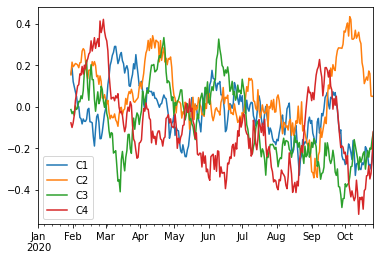

In [ ]:
df.rolling(30).mean().plot()

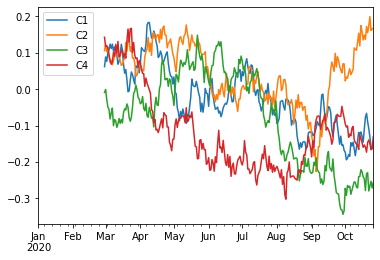

In [ ]:
df.rolling(60).mean().plot()

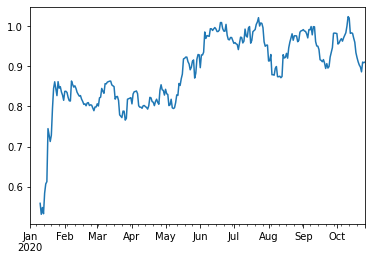

In [ ]:
df.C1.rolling(60, min_periods = 10).std().plot()

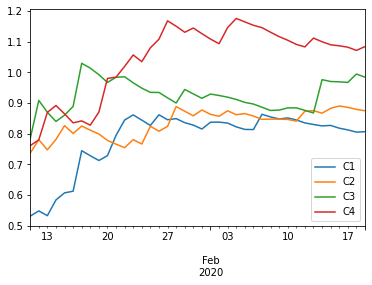

In [ ]:
df.rolling(60, min_periods = 10).std()[10:50].plot()

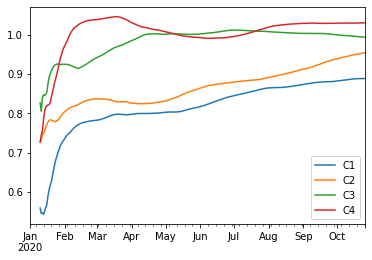

In [ ]:
df.rolling(60,min_periods = 10).std().expanding().mean().plot()

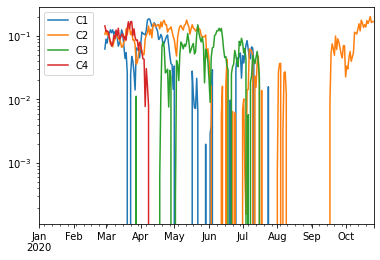

In [ ]:
df.rolling(60).mean().plot(logy = True)

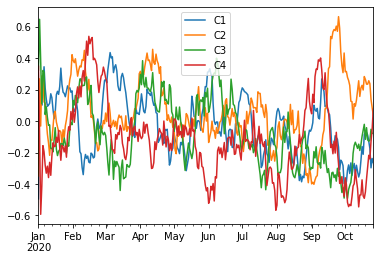

In [ ]:
df.rolling('20D').mean().plot()

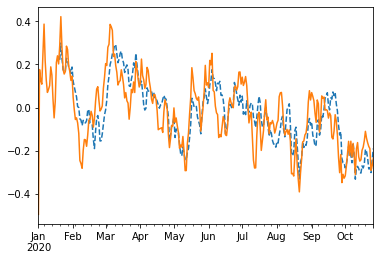

In [ ]:
df.C1.rolling(30,min_periods = 20).mean().plot(style = '--', label = 'Simple MA')
df.C1.ewm(span = 30).mean().plot(style = '-', label='EWMA')

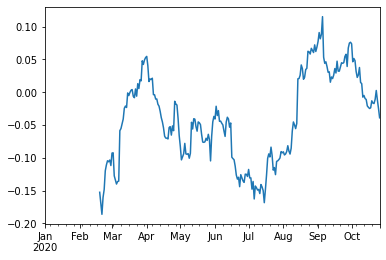

In [ ]:
df.C1.rolling(100,min_periods = 50).corr(df.C3).plot()

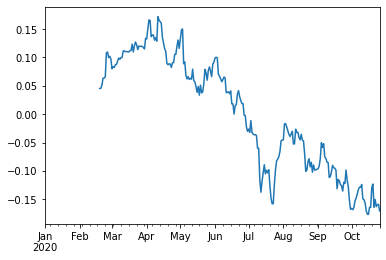

In [ ]:
df.C2.rolling(100,min_periods = 50).corr(df.C4).plot() #상관관계

## 데이터 읽기 및 저장


함수 |설명
-----|------
`read_csv` |파일, URL, 객체로부터 구분된 데이터 읽기 (기본 구분자: ',')
`read_table`| 파일, URL, 객체로부터 구분된 데이터 읽기 (기본 구분자: '\t')
`read_fwf` |고정폭 컬럼 형식에서 데이터 읽기 (구분자 없는 데이터)
`read_clipboard`| 클립보드에 있는 데이터 읽기. 웹페이지에 있는 표를 읽어올 때 유용
`read_excel` |엑셀 파일(xls, xlsx)에서 표 형식 데이터 읽기
`read_hdf`| Pandas에서 저장한 HDFS 파일의 데이터 읽기
`read_html` |HTML 문서 내의 모든 테이블 데이터 읽기
`read_json`| JSON에서 데이터 읽기
`read_msgpack` |메시지팩 바이너리 포맷으로 인코딩된 pandas 데이터 읽기
`read_pickle` |파이썬 피클 포맷으로 저장된 객체 읽기
`read_sas` |SAS 시스템의 사용자 정의 저장 포맷 데이터 읽기
`read_sql`| SQL 질의 결과를 DataFrame 형식으로 읽기
`read_stata` |Stata 파일에서 데이터 읽기
`read_feather`| Feather 바이너리 파일 포맷의 데이터 읽기


### 텍스트 파일 읽기/쓰기

In [ ]:
%%writefile example1.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Overwriting example1.csv


In [ ]:
!ls

example1.csv  example3.txt  example5.csv  output.csv
example2.csv  example4.csv  example6.csv  sample_data


In [ ]:
pd.read_csv('example1.csv')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [ ]:
%%writefile example2.csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Overwriting example2.csv


In [ ]:
pd.read_csv('example2.csv', header=None)

,0,1,2,3,4,5
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [ ]:
pd.read_csv('example2.csv', names = ['a', 'b', 'c', 'd', 'e', 'text'])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [ ]:
pd.read_csv('example2.csv', names = ['a', 'b', 'c', 'd', 'e', 'text'], index_col = 'text')

,a,b,c,d,e
text,,,,,
hi,1,2,3,4,5
pandas,6,7,8,9,10
csv,11,12,13,14,15


In [ ]:
%%writefile example3.txt
  a b b c
1 0.1 0.2 0.3
2 0.4 0.5 0.6
3 0.4 0.8 0.9

Overwriting example3.txt


In [ ]:
pd.read_table('example3.txt', sep='\s+') #separated by space or tab

,a,b,b.1,c
0,1,0.1,0.2,0.3
1,2,0.4,0.5,0.6
2,3,0.4,0.8,0.9


In [ ]:
%%writefile example4.csv
#파일 설명
a, b, c, d, e, text
#컬럼은 a,b,c,d,e와 text가 있음
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Overwriting example4.csv


In [ ]:
pd.read_csv('example4.csv', skiprows = [0,2])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [ ]:
%%writefile example5.csv
a, b, c, d, e, text
1, 2, NA, 4, 5, hi
6, 7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv

Overwriting example5.csv


In [ ]:
pd.read_csv('example5.csv')

,a,b,c,d,e,text
0,1,2,NA,4,5,hi
1,6,7,8,NULL,10,pandas
2,11,NA,13,14,15,csv


In [ ]:
%%writefile example6.csv
a, b, c, d, e, text
1, 2, NA, 4, 5, hi
6, 7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv
1, 2, NA, 4, 5, hi
6, 7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv
1, 2, NA, 4, 5, hi
6, 7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv
1, 2, NA, 4, 5, hi
6, 7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv
1, 2, NA, 4, 5, hi
6, 7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv

Overwriting example6.csv


In [ ]:
pd.read_csv('example6.csv', nrows = 5) #5개 row만 가져오기

,a,b,c,d,e,text
0,1,2,NA,4,5,hi
1,6,7,8,NULL,10,pandas
2,11,NA,13,14,15,csv
3,1,2,NA,4,5,hi
4,6,7,8,NULL,10,pandas


In [ ]:
df = pd.read_csv('example6.csv')
df

,a,b,c,d,e,text
0,1,2,NA,4,5,hi
1,6,7,8,NULL,10,pandas
2,11,NA,13,14,15,csv
3,1,2,NA,4,5,hi
4,6,7,8,NULL,10,pandas
5,11,NA,13,14,15,csv
6,1,2,NA,4,5,hi
7,6,7,8,NULL,10,pandas
8,11,NA,13,14,15,csv
9,1,2,NA,4,5,hi


In [ ]:
df.to_csv('output.csv')

In [ ]:
!cat output.csv

,a, b, c, d, e, text
0,1, 2, NA, 4,5, hi
1,6, 7, 8, NULL,10, pandas
2,11, NA, 13, 14,15, csv
3,1, 2, NA, 4,5, hi
4,6, 7, 8, NULL,10, pandas
5,11, NA, 13, 14,15, csv
6,1, 2, NA, 4,5, hi
7,6, 7, 8, NULL,10, pandas
8,11, NA, 13, 14,15, csv
9,1, 2, NA, 4,5, hi
10,6, 7, 8, NULL,10, pandas
11,11, NA, 13, 14,15, csv
12,1, 2, NA, 4,5, hi
13,6, 7, 8, NULL,10, pandas
14,11, NA, 13, 14,15, csv


In [ ]:
dr = pd.date_range('2020-01-01', periods = 10)
ts = pd.Series(np.arange(10), index = dr)

In [ ]:
ts.to_csv('ts.csv', header = ['value'])

In [ ]:
!cat ts.csv

,value
2020-01-01,0
2020-01-02,1
2020-01-03,2
2020-01-04,3
2020-01-05,4
2020-01-06,5
2020-01-07,6
2020-01-08,7
2020-01-09,8
2020-01-10,9


In [ ]:
%%writefile example.json
[{'a':1,'b':2,'c':3,'d':4,'e':5},
 {'a':6,'b':7,'c':8,'d':9,'e':10},
 {'a':11,'b':12,'c':13,'d':14,'e':15}]

Writing example.json


In [ ]:
!cat example.json

[{'a':1,'b':2,'c':3,'d':4,'e':5},
 {'a':6,'b':7,'c':8,'d':9,'e':10},
 {'a':11,'b':12,'c':13,'d':14,'e':15}]

In [ ]:
pd.read_json('example.json')

ValueError: ignored

In [ ]:
ts.to_json("output.json")

In [ ]:
!cat output.json

{"1577836800000":0,"1577923200000":1,"1578009600000":2,"1578096000000":3,"1578182400000":4,"1578268800000":5,"1578355200000":6,"1578441600000":7,"1578528000000":8,"1578614400000":9}

In [ ]:
df.to_json("output.json")

In [ ]:
!cat output.json

{"a":{"0":-0.0375630827,"1":-0.9969537298,"2":0.2312576946,"3":0.3892306905,"4":1.0436543737,"5":0.1629467863,"6":-0.3787280745,"7":0.8662146616,"8":-0.8350845513,"9":1.0533877627,"10":1.0458772791,"11":0.581177198,"12":-0.6560611884,"13":-0.5389713139,"14":-1.0098293011,"15":1.1372616267,"16":0.5952401084,"17":0.4611322776,"18":-1.3434570528,"19":2.290598469,"20":-0.1209746385,"21":-1.4177780414,"22":1.2960299021,"23":-0.7229746552,"24":0.4210364055,"25":0.0785321445,"26":2.0713591781,"27":-1.6420939135,"28":-0.8088170014,"29":-2.0655524641,"30":0.6321155366,"31":-1.067413417,"32":0.8691975037,"33":0.2654507848,"34":-0.5487997306,"35":-0.9398520916,"36":-0.5569848195,"37":0.2002775411,"38":0.8045120434,"39":-0.5712328199,"40":0.8058709235,"41":0.1179261635,"42":-0.4417489476,"43":0.6117467546,"44":-0.3292533784,"45":0.2223187403,"46":0.3119994217,"47":0.0897109529,"48":-1.1310911558,"49":0.6054691311,"50":0.5956219901,"51":0.4845732869,"52":-1.0043623191,"53":0.3920757907,"54":1.08517

### 이진 데이터 파일 읽기/쓰기

In [ ]:
df = pd.read_csv('example1.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [ ]:
df.to_pickle('df_pickle')
pd.read_pickle('df_pickle')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [ ]:
df = pd.DataFrame({'a':np.random.randn(100),
                  'b':np.random.randn(100),
                  'c':np.random.randn(100)})
df

,a,b,c
0,0.488437,0.718324,-0.718603
1,-0.365008,-0.362997,1.409373
2,-3.058221,0.081508,-2.595893
3,0.671808,-0.301728,-0.329190
4,-0.782002,0.231750,1.650163
...,...,...,...
95,-1.128355,1.338386,-0.439329
96,0.628781,1.001627,-0.973844
97,0.217994,-1.690133,-1.326473
98,0.418433,0.361675,-0.905780


In [ ]:
h = pd.HDFStore('data.h5')
h['obj1'] = df
h['obj1_col1'] = df['a']
h['obj1_col2'] = df['b']
h['obj1_col3'] = df['c']
h

<class 'pandas.io.pytables.HDFStore'>
File path: data.h5

In [ ]:
h['obj1']

,a,b,c
0,0.488437,0.718324,-0.718603
1,-0.365008,-0.362997,1.409373
2,-3.058221,0.081508,-2.595893
3,0.671808,-0.301728,-0.329190
4,-0.782002,0.231750,1.650163
...,...,...,...
95,-1.128355,1.338386,-0.439329
96,0.628781,1.001627,-0.973844
97,0.217994,-1.690133,-1.326473
98,0.418433,0.361675,-0.905780


In [ ]:
h.put('obj2', df, format='table')

In [ ]:
h.select('obj2', where=['index > 50 and index <= 60'])

,a,b,c
51,0.080358,-0.246862,0.682525
52,-0.700134,0.015103,3.189837
53,-0.622337,1.516524,0.396375
54,0.476607,0.463258,-1.359170
55,0.668722,0.417558,-0.453045
56,-0.220681,-0.828081,-0.774889
57,-1.476316,0.027333,0.588210
58,-0.154239,-0.762031,-1.551520
59,0.557401,-1.211531,-1.616658
60,0.431936,-2.221162,-0.335846


In [ ]:
h.close()

In [ ]:
df.to_hdf('data.h5','obj3', format = 'table')

In [ ]:
pd.read_hdf('data.h5', 'obj3', where = ['index < 10'])

,a,b,c
0,0.488437,0.718324,-0.718603
1,-0.365008,-0.362997,1.409373
2,-3.058221,0.081508,-2.595893
3,0.671808,-0.301728,-0.329190
4,-0.782002,0.231750,1.650163
5,-0.395991,-0.364195,0.017847
6,-0.732867,0.360919,1.353557
7,-1.050490,1.230751,-0.011792
8,0.124467,-0.635199,-0.741862
9,-0.153099,0.301270,0.165922


In [ ]:
df.to_excel('example.xlsx', 'Sheet1')

In [ ]:
!ls

data.h5       example2.csv  example5.csv  example.xlsx	sample_data
df_pickle     example3.txt  example6.csv  output.csv	ts.csv
example1.csv  example4.csv  example.json  output.json


In [ ]:
pd.read_excel('example.xlsx', 'Sheet1')

,Unnamed: 0,a,b,c
0,0,0.488437,0.718324,-0.718603
1,1,-0.365008,-0.362997,1.409373
2,2,-3.058221,0.081508,-2.595893
3,3,0.671808,-0.301728,-0.329190
4,4,-0.782002,0.231750,1.650163
...,...,...,...,...
95,95,-1.128355,1.338386,-0.439329
96,96,0.628781,1.001627,-0.973844
97,97,0.217994,-1.690133,-1.326473
98,98,0.418433,0.361675,-0.905780


## 데이터 정제

### 누락값 처리

* 대부분의 실제 데이터들은 정제되지 않고 누락값들이 존재
* 서로 다른 데이터들은 다른 형태의 결측을 가짐
* 결측 데이터는 `null`, `NaN`, `NA`로 표기

#### None: 파이썬 누락 데이터

In [ ]:
a = np.array([1, 2, None, 4, 5])
a

array([1, 2, None, 4, 5], dtype=object)

In [ ]:
a.sum() #error because of None

TypeError: ignored

#### NaN: 누락된 수치 데이터

In [ ]:
a = np.array([1, 2, np.nan, 4, 5])
a.dtype

dtype('float64')

In [ ]:
0 + np.nan

nan

In [ ]:
np.nan + np.nan

nan

In [ ]:
a.sum(), a.min(), a.max()

(nan, nan, nan)

In [ ]:
np.nansum(a), np.nanmin(a), np.nanmax(a)

(12.0, 1.0, 5.0)

In [ ]:
pd.Series([1, 2, np.nan, 4, None])

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

In [ ]:
s = pd.Series(range(5), dtype = int)
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [ ]:
s[0] = None
s

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [ ]:
s[3] = np.nan

In [ ]:
s = pd.Series([True, False, None, np.nan])
s

0     True
1    False
2     None
3      NaN
dtype: object

#### Null 값 처리


In [ ]:
s = pd.Series([1, 2, np.nan, 'String', None])
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [ ]:
s.isnull() #누락값 여부 확인

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [ ]:
s[s.notnull()]

0         1
1         2
3    String
dtype: object

In [ ]:
s.dropna() #nan/None drop

0         1
1         2
3    String
dtype: object

In [ ]:
df.dropna(axis = 'columns')

,a,b,c
0,0.488437,0.718324,-0.718603
1,-0.365008,-0.362997,1.409373
2,-3.058221,0.081508,-2.595893
3,0.671808,-0.301728,-0.329190
4,-0.782002,0.231750,1.650163
...,...,...,...
95,-1.128355,1.338386,-0.439329
96,0.628781,1.001627,-0.973844
97,0.217994,-1.690133,-1.326473
98,0.418433,0.361675,-0.905780


In [ ]:
df[3] = np.nan
df

,a,b,c,3
0,0.488437,0.718324,-0.718603,NaN
1,-0.365008,-0.362997,1.409373,NaN
2,-3.058221,0.081508,-2.595893,NaN
3,0.671808,-0.301728,-0.329190,NaN
4,-0.782002,0.231750,1.650163,NaN
...,...,...,...,...
95,-1.128355,1.338386,-0.439329,NaN
96,0.628781,1.001627,-0.973844,NaN
97,0.217994,-1.690133,-1.326473,NaN
98,0.418433,0.361675,-0.905780,NaN


In [ ]:
df.dropna(axis = 'columns', how = 'all')

,a,b,c
0,0.488437,0.718324,-0.718603
1,-0.365008,-0.362997,1.409373
2,-3.058221,0.081508,-2.595893
3,0.671808,-0.301728,-0.329190
4,-0.782002,0.231750,1.650163
...,...,...,...
95,-1.128355,1.338386,-0.439329
96,0.628781,1.001627,-0.973844
97,0.217994,-1.690133,-1.326473
98,0.418433,0.361675,-0.905780


In [ ]:
df.dropna(axis = 'rows', thresh = 3)

,a,b,c,3
0,0.488437,0.718324,-0.718603,NaN
1,-0.365008,-0.362997,1.409373,NaN
2,-3.058221,0.081508,-2.595893,NaN
3,0.671808,-0.301728,-0.329190,NaN
4,-0.782002,0.231750,1.650163,NaN
...,...,...,...,...
95,-1.128355,1.338386,-0.439329,NaN
96,0.628781,1.001627,-0.973844,NaN
97,0.217994,-1.690133,-1.326473,NaN
98,0.418433,0.361675,-0.905780,NaN


In [ ]:
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [ ]:
s.fillna(0)

0         1
1         2
2         0
3    String
4         0
dtype: object

In [ ]:
s.fillna(method = 'ffill') #forward fill

0         1
1         2
2         2
3    String
4    String
dtype: object

In [ ]:
s.fillna(method = 'bfill') #backward fill

0         1
1         2
2    String
3    String
4      None
dtype: object

In [ ]:
df

,a,b,c,3
0,0.488437,0.718324,-0.718603,NaN
1,-0.365008,-0.362997,1.409373,NaN
2,-3.058221,0.081508,-2.595893,NaN
3,0.671808,-0.301728,-0.329190,NaN
4,-0.782002,0.231750,1.650163,NaN
...,...,...,...,...
95,-1.128355,1.338386,-0.439329,NaN
96,0.628781,1.001627,-0.973844,NaN
97,0.217994,-1.690133,-1.326473,NaN
98,0.418433,0.361675,-0.905780,NaN


In [ ]:
df.fillna(method = 'ffill', axis = 0)

,a,b,c,3
0,0.488437,0.718324,-0.718603,NaN
1,-0.365008,-0.362997,1.409373,NaN
2,-3.058221,0.081508,-2.595893,NaN
3,0.671808,-0.301728,-0.329190,NaN
4,-0.782002,0.231750,1.650163,NaN
...,...,...,...,...
95,-1.128355,1.338386,-0.439329,NaN
96,0.628781,1.001627,-0.973844,NaN
97,0.217994,-1.690133,-1.326473,NaN
98,0.418433,0.361675,-0.905780,NaN


In [ ]:
df.fillna(method = 'ffill', axis = 1)

,a,b,c,3
0,0.488437,0.718324,-0.718603,-0.718603
1,-0.365008,-0.362997,1.409373,1.409373
2,-3.058221,0.081508,-2.595893,-2.595893
3,0.671808,-0.301728,-0.329190,-0.329190
4,-0.782002,0.231750,1.650163,1.650163
...,...,...,...,...
95,-1.128355,1.338386,-0.439329,-0.439329
96,0.628781,1.001627,-0.973844,-0.973844
97,0.217994,-1.690133,-1.326473,-1.326473
98,0.418433,0.361675,-0.905780,-0.905780


In [ ]:
df.fillna(method = 'bfill', axis = 0)

,a,b,c,3
0,0.488437,0.718324,-0.718603,NaN
1,-0.365008,-0.362997,1.409373,NaN
2,-3.058221,0.081508,-2.595893,NaN
3,0.671808,-0.301728,-0.329190,NaN
4,-0.782002,0.231750,1.650163,NaN
...,...,...,...,...
95,-1.128355,1.338386,-0.439329,NaN
96,0.628781,1.001627,-0.973844,NaN
97,0.217994,-1.690133,-1.326473,NaN
98,0.418433,0.361675,-0.905780,NaN


In [ ]:
df.fillna(method = 'bfill', axis = 1)

,a,b,c,3
0,0.488437,0.718324,-0.718603,NaN
1,-0.365008,-0.362997,1.409373,NaN
2,-3.058221,0.081508,-2.595893,NaN
3,0.671808,-0.301728,-0.329190,NaN
4,-0.782002,0.231750,1.650163,NaN
...,...,...,...,...
95,-1.128355,1.338386,-0.439329,NaN
96,0.628781,1.001627,-0.973844,NaN
97,0.217994,-1.690133,-1.326473,NaN
98,0.418433,0.361675,-0.905780,NaN


### 중복 제거

In [ ]:
df = pd.DataFrame({'c1': ['a','b','c'] * 2 + ['b'] + ['c'],
                  'c2': [1, 2, 1, 1, 2, 3, 3, 4]})
df

,c1,c2
0,a,1
1,b,2
2,c,1
3,a,1
4,b,2
5,c,3
6,b,3
7,c,4


In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [ ]:
df.drop_duplicates()

,a,b,c,3
0,0.488437,0.718324,-0.718603,NaN
1,-0.365008,-0.362997,1.409373,NaN
2,-3.058221,0.081508,-2.595893,NaN
3,0.671808,-0.301728,-0.329190,NaN
4,-0.782002,0.231750,1.650163,NaN
...,...,...,...,...
95,-1.128355,1.338386,-0.439329,NaN
96,0.628781,1.001627,-0.973844,NaN
97,0.217994,-1.690133,-1.326473,NaN
98,0.418433,0.361675,-0.905780,NaN


### 값 치환

In [ ]:
s = pd.Series([1., 2., -999., 3., -1000., 4.])
s

0       1.0
1       2.0
2    -999.0
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [ ]:
s.replace(-999, np.nan)

0       1.0
1       2.0
2       NaN
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [ ]:
s.replace([-999,-1000], np.nan)

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
5    4.0
dtype: float64

In [ ]:
s.replace([-999,-1000], [np.nan, 0])

0    1.0
1    2.0
2    NaN
3    3.0
4    0.0
5    4.0
dtype: float64

## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly